### This is the phase one for the project Creadit Card Data Analysis to launch the new credit card product.

#### This project is divided into two phases:
1. **Phase 1**: Data Analysis and Visualization
2. **Phase 2**: Model Building and Evaluation

#### Phase 1 includes:
- Data Loading
- Data Cleaning
- Data Exploration
- Data Visualization

#### We have data in CSV format as well as DB format. We will use the CSV format and db format for this project.



### 01 - 01 Let's start with loading the data from excel file.


In [1]:
### Load Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
### Load the customer data
# Assuming the data is in a CSV file named 'customers.csv' in a 'data' directory
# Adjust the path as necessary

df_cust = pd.read_csv('data/customers.csv')
df_cust.head()

,cust_id,name,gender,age,location,occupation,annual_income,marital_status
0,1,Manya Acharya,Female,2,City,Business Owner,358211.0,Married
1,2,Anjali Pandey,Female,47,City,Consultant,65172.0,Single
2,3,Aaryan Chauhan,Male,21,City,Freelancer,22378.0,Married
3,4,Rudra Bali,Male,24,Rural,Freelancer,33563.0,Married
4,5,Advait Malik,Male,48,City,Consultant,39406.0,Married


In [3]:
### Display the shape of the DataFrame
# This will show the number of rows and columns in the DataFrame
df_cust.shape

(1000, 8)

In [4]:
### Load other data of credit card profiles and transactions
# Assuming the data is in CSV files named 'credit_profiles.csv' and 'transactions.csv'

df_cs = pd.read_csv('data/credit_profiles.csv')
df_trans = pd.read_csv('data/transactions.csv')



In [5]:
df_cs.head()

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit
0,1,749,0.585171,19571.0,0.0,40000.0
1,2,587,0.107928,161644.0,2.0,1250.0
2,3,544,0.854807,513.0,4.0,1000.0
3,4,504,0.336938,224.0,2.0,1000.0
4,5,708,0.586151,18090.0,2.0,40000.0


In [6]:
df_trans.head()

,tran_id,cust_id,tran_date,tran_amount,platform,product_category,payment_type
0,1,705,2023-01-01,63,Flipkart,Electronics,Phonepe
1,2,385,2023-01-01,99,Alibaba,Fashion & Apparel,Credit Card
2,3,924,2023-01-01,471,Shopify,Sports,Phonepe
3,4,797,2023-01-01,33,Shopify,Fashion & Apparel,Gpay
4,5,482,2023-01-01,68,Amazon,Fashion & Apparel,Net Banking


In [7]:
df_cust.shape, df_cs.shape, df_trans.shape

((1000, 8), (1004, 6), (500000, 7))

### 01 - 012 Let's start with loading the data from DB.


In [8]:
import mysql.connector

In [9]:
### Load the customer data from mysql database
conn = mysql.connector.connect(
    host='localhost',
    user='root',
    password='root',  # Replace with your MySQL password
    database='e_master_card'  # Replace with your database name
)

In [10]:
### test connection
if conn.is_connected():
    print("Connected to the database")
else:    
    print("Failed to connect to the database")

Connected to the database


In [11]:
### Load the customer data
# Assuming the data is in a table named 'customers' in the database

df_cust = pd.read_sql('SELECT * FROM customers', conn)
df_cust.head()

### Load other data of credit card profiles and transactions
### Assuming the data is in table named 'credit_profiles' and 'transactions' in the database

df_cs = pd.read_sql('SELECT * FROM credit_profiles', conn)
df_trans = pd.read_sql('SELECT * FROM transactions', conn)
### Display the shape of the DataFrames
df_cs.shape, df_trans.shape

C:\Users\Suraj Khodade\AppData\Local\Temp\ipykernel_11128\736031766.py:4: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_cust = pd.read_sql('SELECT * FROM customers', conn)
C:\Users\Suraj Khodade\AppData\Local\Temp\ipykernel_11128\736031766.py:10: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_cs = pd.read_sql('SELECT * FROM credit_profiles', conn)
C:\Users\Suraj Khodade\AppData\Local\Temp\ipykernel_11128\736031766.py:11: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_trans = pd.read_sql('SELECT * FROM transactions', 

((1004, 6), (500000, 7))

### 02 Data Cleaning - Handling the null values


In [12]:
### Get Description of the DataFrames df_cust
df_cust.describe()


## In description, we can see that the 
# 'age' column has a minimum value of 1, which is likely an error since age cannot be less than 18 in this context.
# The 'income' column has a minimum value of 2, which might indicate that some customers have no income reported.


,cust_id,age,annual_income
count,1000.000000,1000.000000,1000.000000
mean,500.500000,36.405000,132439.799000
std,288.819436,15.666155,113706.313793
min,1.000000,1.000000,0.000000
25%,250.750000,26.000000,42229.750000
50%,500.500000,32.000000,107275.000000
75%,750.250000,46.000000,189687.500000
max,1000.000000,135.000000,449346.000000


In [13]:
### Check null values in the df_cust DataFrame  
df_cust.isnull().sum()

cust_id           0
name              0
gender            0
age               0
location          0
occupation        0
annual_income     0
marital_status    0
dtype: int64

In [14]:
### We can see annual_income has 50 null values, 
# let's check those rows to understand the context of these null values.
df_cust[df_cust.annual_income.isnull()].head()

,cust_id,name,gender,age,location,occupation,annual_income,marital_status


In [15]:
### Below way we can deal with the null values in annual_income column
## 1. We can drop the rows with null values in annual_income
## 2. We can fill the null values with the mean or median of the annual_income column
## 3. We can fill the null values with a specific value, like 0 or 'Unknown'
## 4. We ca use forward fill or backward fill to fill the null values with the previous or next value in the column
## 5. We can use interpolation to fill the null values with the average of the previous

## In our case, we will fill the null values with the median of the annual_income column
## Before replace with median, if yur observe occupation column,
#  So we can calulate the median income for each occupation and fill the null values with the median income of that occupation

occupation_median_income = df_cust.groupby('occupation')['annual_income'].median()
occupation_median_income

occupation
Accountant              65265.0
Artist                  44915.0
Business Owner         254881.0
Consultant              51175.0
Data Scientist         127889.0
Freelancer              45189.5
Fullstack Developer     74457.0
Name: annual_income, dtype: float64

In [16]:
### Let's create a function to fill the null values in annual_income column with the median income of the occupation
def fill_null_income(row):
    if pd.isnull(row['annual_income']):
        return occupation_median_income[row['occupation']]
    else:
        return row['annual_income']

In [17]:
## Apply the function to the annual_income column
# This will fill the null values in the annual_income column with the median income of the occupation
# axis=1 means we are applying the function row-wise
df_cust['annual_income'] = df_cust.apply(fill_null_income, axis=1)

## Or You can use lambda function to achieve the same result
## df_cust['annual_income'] = df_cust.apply(lambda row: occupation_median_income[row['occupation']] if pd.isnull(row['annual_income']) else row['annual_income'], axis=1)

In [18]:
## Verify that the null values in annual_income column are filled
df_cust.isnull().sum()

cust_id           0
name              0
gender            0
age               0
location          0
occupation        0
annual_income     0
marital_status    0
dtype: int64

Text(0.5, 1.0, 'Histogram of Annual Income')

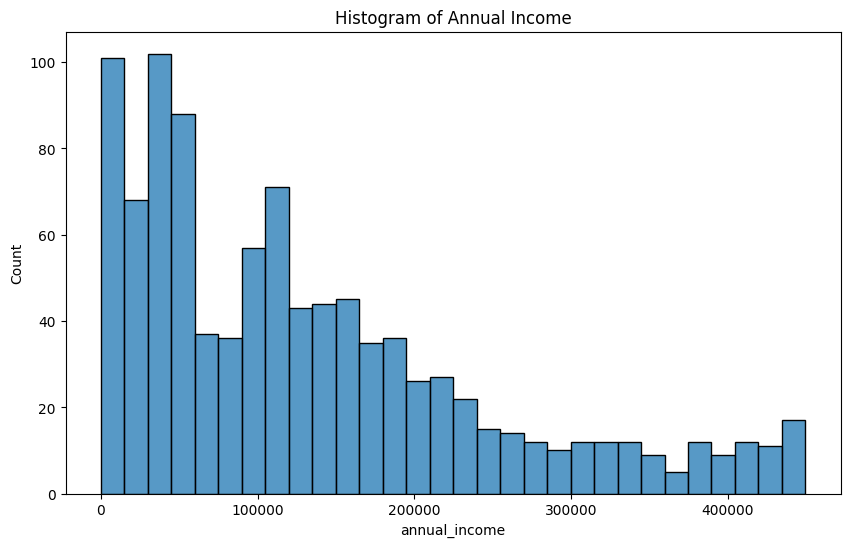

In [19]:
## Let's check income distribution
plt.figure(figsize=(10, 6))
sns.histplot(df_cust['annual_income'], bins=30, kde=False)
plt.title('Histogram of Annual Income')

In [20]:
## Check description of the DataFrame df_trans and df_cs

df_cs.describe()

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit
count,1004.000000,1004.000000,1000.000000,1000.000000,1000.000000,935.000000
mean,500.850598,588.655378,0.498950,9683.597000,1.955000,19235.561497
std,288.315670,152.575244,0.233139,25255.893671,1.414559,24489.997195
min,1.000000,300.000000,0.103761,33.000000,0.000000,500.000000
25%,251.750000,459.000000,0.293917,221.000000,1.000000,750.000000
50%,502.500000,601.000000,0.487422,550.000000,2.000000,1250.000000
75%,749.250000,737.250000,0.697829,11819.500000,3.000000,40000.000000
max,1000.000000,799.000000,0.899648,209901.000000,4.000000,60000.000000


In [21]:
df_cs.isnull().sum()    

cust_id                            0
credit_score                       0
credit_utilisation                 4
outstanding_debt                   4
credit_inquiries_last_6_months     4
credit_limit                      69
dtype: int64

In [22]:
## as this is a transaction data, it is expected to have some null values in the 'transaction_amount' column

In [23]:
df_trans.isnull().sum() 

tran_id                0
cust_id                0
tran_date              0
tran_amount            0
platform            4941
product_category       0
payment_type           0
dtype: int64

In [24]:
df_trans[df_trans.platform.isnull()]

,tran_id,cust_id,tran_date,tran_amount,platform,product_category,payment_type
355,356,58,2023-01-01,237,None,Electronics,Net Banking
418,419,383,2023-01-01,338,None,Electronics,Credit Card
607,608,421,2023-01-01,700,None,Electronics,Phonepe
844,845,945,2023-01-01,493,None,Sports,Credit Card
912,913,384,2023-01-01,85,None,Fashion & Apparel,Phonepe
...,...,...,...,...,...,...,...
499579,499580,924,2023-09-05,31,None,Fashion & Apparel,Gpay
499646,499647,944,2023-09-05,58445,None,Fashion & Apparel,Phonepe
499725,499726,620,2023-09-05,15,None,Sports,Net Banking
499833,499834,616,2023-09-05,97,None,Fashion & Apparel,Credit Card


In [25]:
## Again we have platform column with null values, but this is strictly not required for our analysis, so we can ignore this column for now.

### 03 Data Cleaning - Check for outliers


In [26]:
df_cust.describe()

,cust_id,age,annual_income
count,1000.000000,1000.000000,1000.000000
mean,500.500000,36.405000,132439.799000
std,288.819436,15.666155,113706.313793
min,1.000000,1.000000,0.000000
25%,250.750000,26.000000,42229.750000
50%,500.500000,32.000000,107275.000000
75%,750.250000,46.000000,189687.500000
max,1000.000000,135.000000,449346.000000


In [27]:
## In above we can clearly see that the 'age' has min value of 1 and maximun value 135, and this is not realistic.
## Also if we see annual_income, it has min value of 2, which is also not realistic.
## Consider annual_income should be atleast 100

## Let's handle outliers for annual_income, to handle this we can replace value less than 100 with occupation median income
## We will use iretation to fill the null values with the average of the previous and next value in the column

for index, row in df_cust.iterrows():
    if row['annual_income'] < 100:
        df_cust.at[index, 'annual_income'] = occupation_median_income[row['occupation']]

C:\Users\Suraj Khodade\AppData\Local\Temp\ipykernel_11128\159094823.py:10: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '45189.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_cust.at[index, 'annual_income'] = occupation_median_income[row['occupation']]


In [28]:
df_cust.describe()

,cust_id,age,annual_income
count,1000.000000,1000.000000,1000.000000
mean,500.500000,36.405000,140137.395500
std,288.819436,15.666155,110450.464107
min,1.000000,1.000000,5175.000000
25%,250.750000,26.000000,49620.500000
50%,500.500000,32.000000,115328.000000
75%,750.250000,46.000000,195514.250000
max,1000.000000,135.000000,449346.000000


In [29]:
## check income less than 100   
df_cust[df_cust.annual_income < 100]

,cust_id,name,gender,age,location,occupation,annual_income,marital_status


In [30]:
## Let's check the age column for outliers
## we will use IQR method to identify outliers

mean = df_cust['age'].mean()
std = df_cust['age'].std()

lower_bound = df_cust.age.mean() - 3 * df_cust.age.std()
upper_bound = df_cust.age.mean() + 3 * df_cust.age.std()

lower_bound, upper_bound

(np.float64(-10.593464130550373), np.float64(83.40346413055038))

In [31]:
df_cust[(df_cust.age<lower_bound)|(df_cust.age>upper_bound)]

,cust_id,name,gender,age,location,occupation,annual_income,marital_status
41,42,Aaryan Shah,Male,110,City,Artist,7621.0,Married
174,175,Rohan Sharma,Male,110,City,Freelancer,23723.0,Married
222,223,Arjun Batra,Male,110,Suburb,Freelancer,210987.0,Married
277,278,Aarav Tandon,Male,110,City,Consultant,96522.0,Single
325,326,Virat Goel,Male,110,City,Accountant,61021.0,Single
610,611,Rehan Verma,Male,135,Rural,Business Owner,444776.0,Married
703,704,Aanya Sharma,Female,110,City,Freelancer,43404.0,Single
709,710,Anika Verma,Female,110,City,Data Scientist,98417.0,Married
728,729,Rehan Yadav,Male,135,City,Business Owner,382836.0,Married
832,833,Ridhi Raj,Female,110,City,Fullstack Developer,95379.0,Single


Text(0.5, 1.0, 'Histogram of Age')

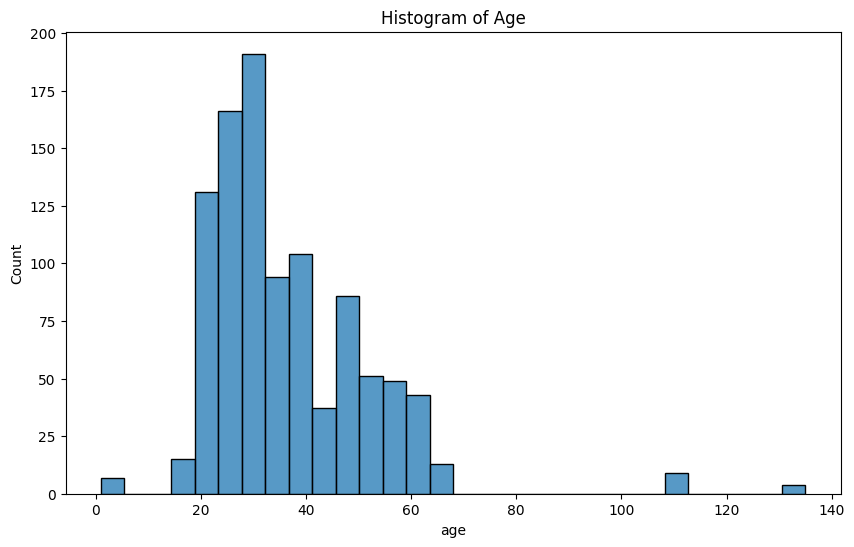

In [32]:
## check distribution of age
plt.figure(figsize=(10, 6))
sns.histplot(df_cust['age'], bins=30, kde=False)
plt.title('Histogram of Age')

In [33]:
## Remove outliers from age column
df_cust_without_outlier = df_cust[(df_cust.age >= lower_bound) & (df_cust.age <= upper_bound)]

Text(0.5, 1.0, 'Histogram of Age')

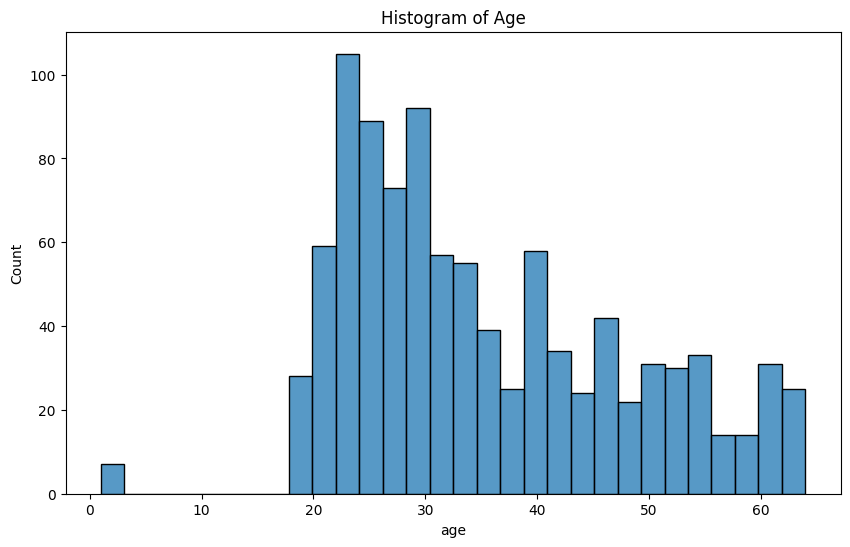

In [34]:
## check distribution of age
plt.figure(figsize=(10, 6))
sns.histplot(df_cust_without_outlier['age'], bins=30, kde=False)
plt.title('Histogram of Age')

In [35]:
df_cust.describe()

,cust_id,age,annual_income
count,1000.000000,1000.000000,1000.000000
mean,500.500000,36.405000,140137.395500
std,288.819436,15.666155,110450.464107
min,1.000000,1.000000,5175.000000
25%,250.750000,26.000000,49620.500000
50%,500.500000,32.000000,115328.000000
75%,750.250000,46.000000,195514.250000
max,1000.000000,135.000000,449346.000000


### 03 Data Visualization - Annual Income

In [36]:
## Find occupation wise annual income average

occupation_avg_income = df_cust.groupby('occupation')['annual_income'].mean().sort_values(ascending=False)
occupation_avg_income


occupation
Business Owner         268119.833910
Data Scientist         136208.603261
Fullstack Developer     78618.385135
Freelancer              76293.089912
Accountant              64123.562500
Consultant              59927.257732
Artist                  45239.842105
Name: annual_income, dtype: float64

C:\Users\Suraj Khodade\AppData\Local\Temp\ipykernel_11128\2394975776.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=occupation_avg_income.index, y=occupation_avg_income.values, palette='viridis')


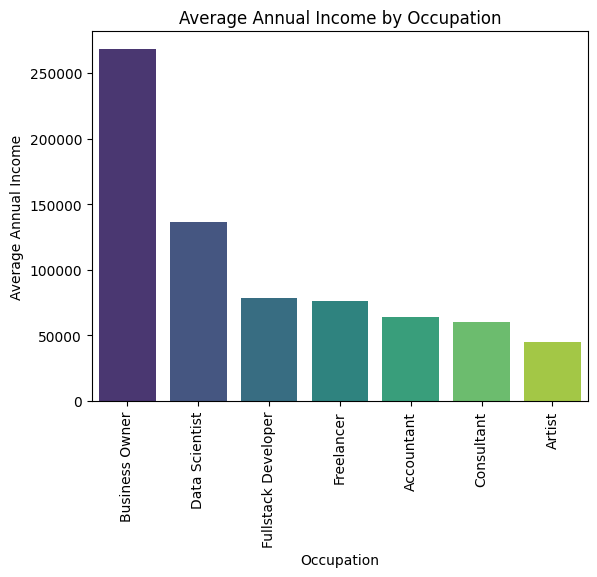

In [37]:
sns.barplot(x=occupation_avg_income.index, y=occupation_avg_income.values, palette='viridis')
plt.xticks(rotation=90)
plt.xlabel('Occupation')
plt.ylabel('Average Annual Income')
plt.title('Average Annual Income by Occupation')
plt.show()

C:\Users\Suraj Khodade\AppData\Local\Temp\ipykernel_11128\3652253967.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_income_per_group.index, y=avg_income_per_group.values, palette='viridis')
C:\Users\Suraj Khodade\AppData\Local\Temp\ipykernel_11128\3652253967.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column, data=df_cust, palette='viridis')


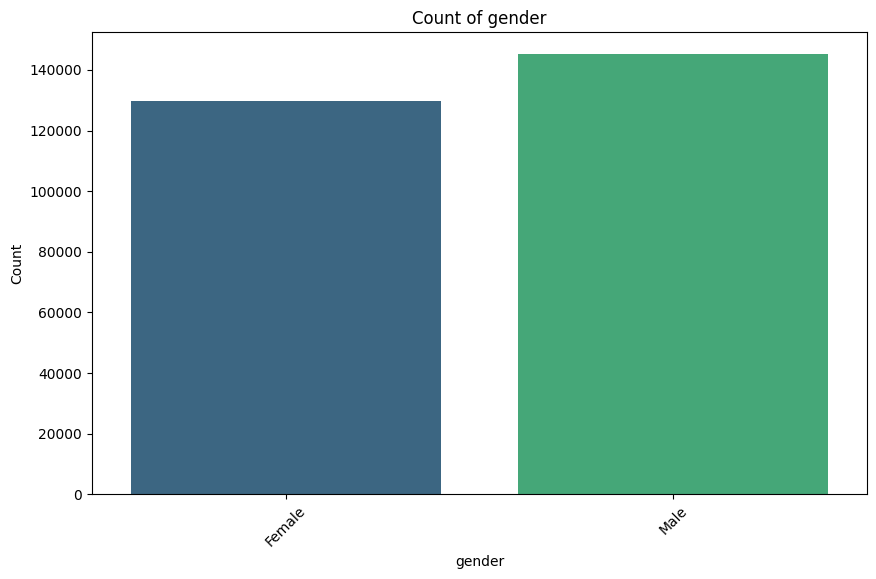

C:\Users\Suraj Khodade\AppData\Local\Temp\ipykernel_11128\3652253967.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_income_per_group.index, y=avg_income_per_group.values, palette='viridis')
C:\Users\Suraj Khodade\AppData\Local\Temp\ipykernel_11128\3652253967.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column, data=df_cust, palette='viridis')


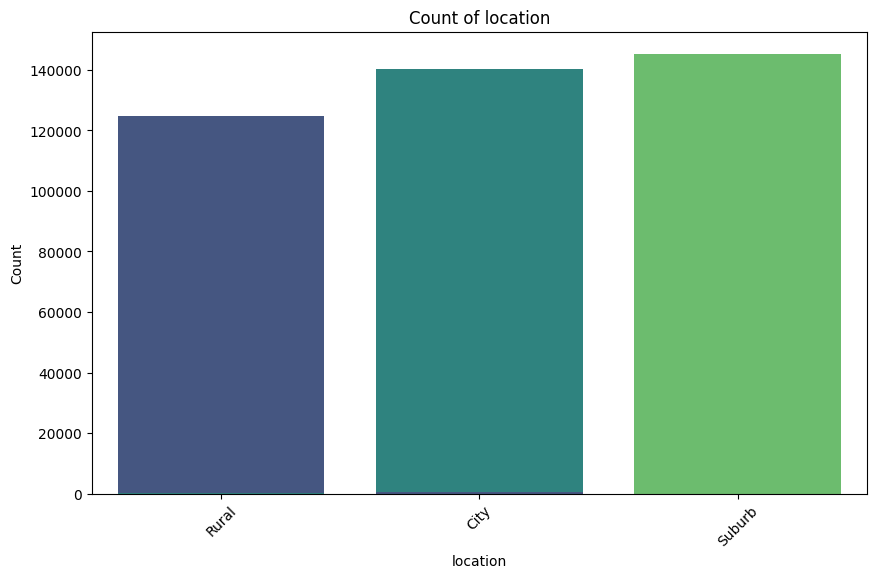

C:\Users\Suraj Khodade\AppData\Local\Temp\ipykernel_11128\3652253967.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_income_per_group.index, y=avg_income_per_group.values, palette='viridis')
C:\Users\Suraj Khodade\AppData\Local\Temp\ipykernel_11128\3652253967.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column, data=df_cust, palette='viridis')


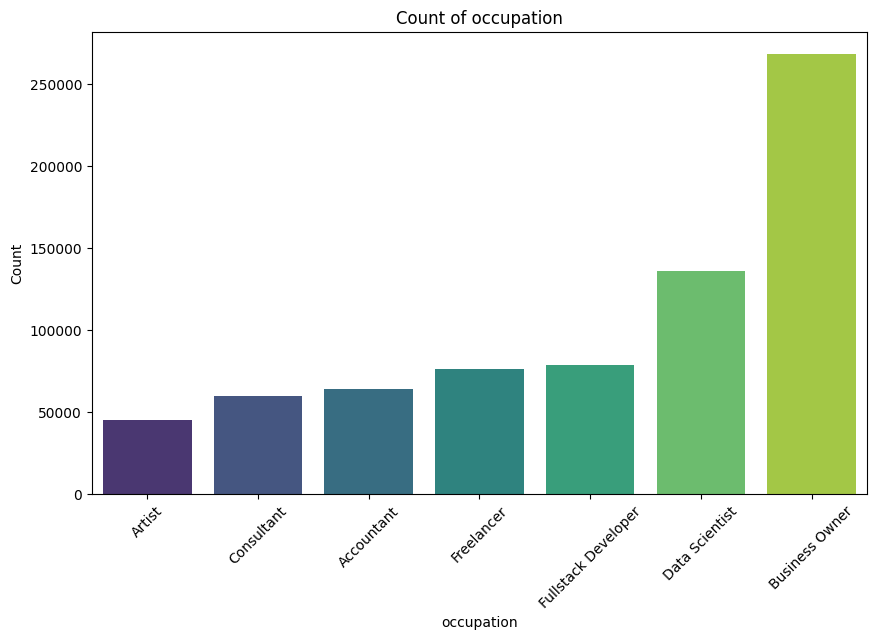

C:\Users\Suraj Khodade\AppData\Local\Temp\ipykernel_11128\3652253967.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_income_per_group.index, y=avg_income_per_group.values, palette='viridis')
C:\Users\Suraj Khodade\AppData\Local\Temp\ipykernel_11128\3652253967.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column, data=df_cust, palette='viridis')


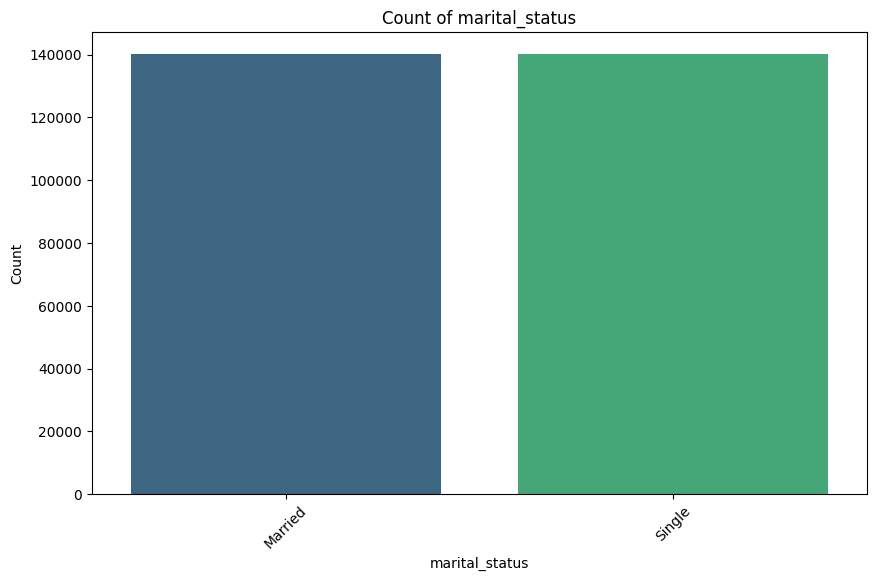

In [38]:
## We can plot for other columns as well, like gender, location, occupation, marital status, etc.

categorical_columns=['gender', 'location', 'occupation', 'marital_status']

for column in categorical_columns:
    plt.figure(figsize=(10, 6))
    avg_income_per_group = df_cust.groupby(column)['annual_income'].mean().sort_values(ascending=False).sort_values()
    sns.barplot(x=avg_income_per_group.index, y=avg_income_per_group.values, palette='viridis')
    plt.xticks(rotation=90)
    sns.countplot(x=column, data=df_cust, palette='viridis')
    plt.title(f'Count of {column}')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()

C:\Users\Suraj Khodade\AppData\Local\Temp\ipykernel_11128\1790311944.py:19: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=cat_col, y='annual_income', data=sorted_data, ci=None, ax=axes[i], palette='tab10')
C:\Users\Suraj Khodade\AppData\Local\Temp\ipykernel_11128\1790311944.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cat_col, y='annual_income', data=sorted_data, ci=None, ax=axes[i], palette='tab10')
C:\Users\Suraj Khodade\AppData\Local\Temp\ipykernel_11128\1790311944.py:25: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45)
C:\Users\Suraj Khodade\AppData\Local\Temp\ipykernel_11128\1790311944.py:19: FutureWarning: 

The `ci` 

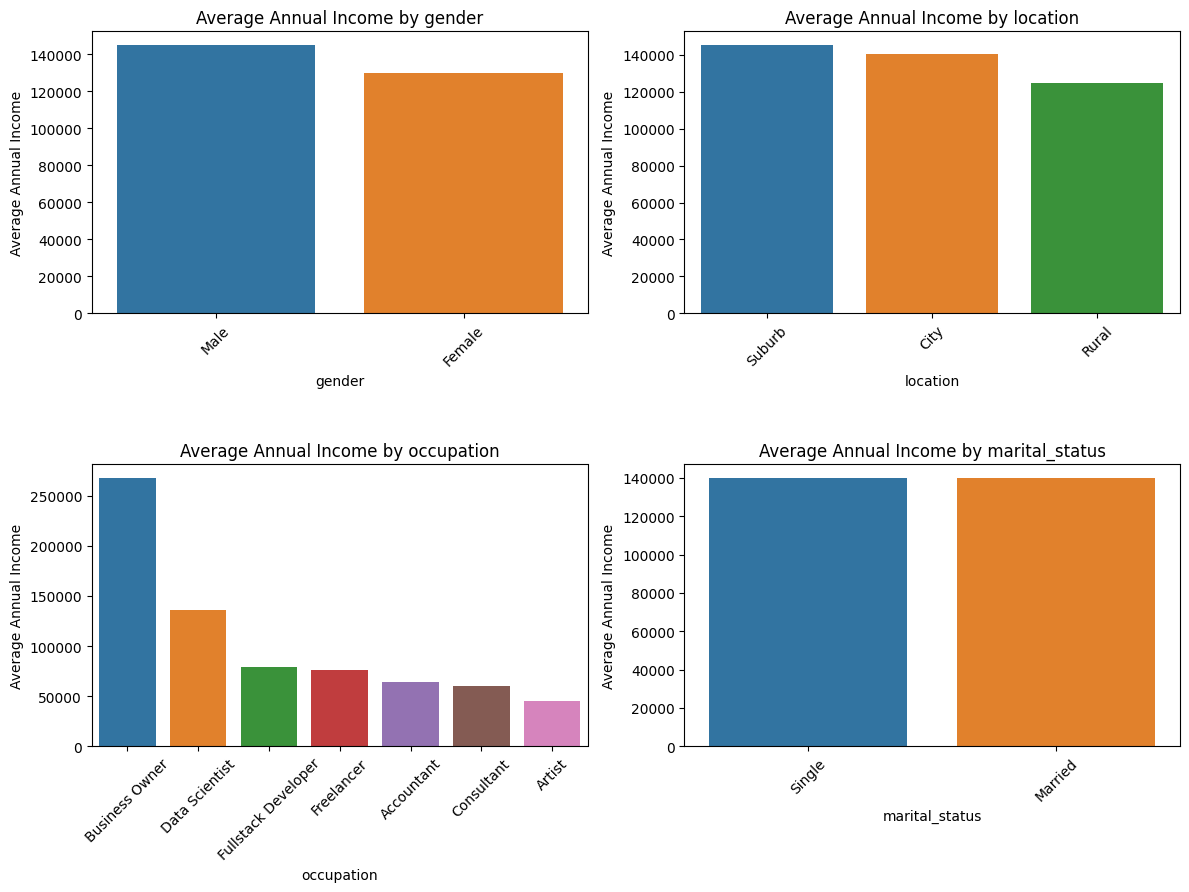

In [39]:
# List of categorical columns
cat_cols = ['gender', 'location', 'occupation', 'marital_status']

num_rows = 3
# Create subplots
fig, axes = plt.subplots(num_rows, 2, figsize=(12, 4 * num_rows))

# Flatten the axes array to make it easier to iterate
axes = axes.flatten()

# Create subplots for each categorical column
for i, cat_col in enumerate(cat_cols):
    # Calculate the average annual income for each category
    avg_income_by_category = df_cust.groupby(cat_col)['annual_income'].mean().reset_index()
    
    # Sort the data by 'annual_income' before plotting
    sorted_data = avg_income_by_category.sort_values(by='annual_income', ascending=False)
    
    sns.barplot(x=cat_col, y='annual_income', data=sorted_data, ci=None, ax=axes[i], palette='tab10')
    axes[i].set_title(f'Average Annual Income by {cat_col}')
    axes[i].set_xlabel(cat_col)
    axes[i].set_ylabel('Average Annual Income')

    # Rotate x-axis labels for better readability
    axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45)

# Hide any unused subplots
for i in range(len(cat_cols), len(axes)):
    fig.delaxes(axes[i])
plt.tight_layout()
plt.show()

## 04 Data Cleaning / analysis - Age

In [40]:
df_cust.head()

,cust_id,name,gender,age,location,occupation,annual_income,marital_status
0,1,Manya Acharya,Female,2,City,Business Owner,358211.0,Married
1,2,Anjali Pandey,Female,47,City,Consultant,65172.0,Single
2,3,Aaryan Chauhan,Male,21,City,Freelancer,22378.0,Married
3,4,Rudra Bali,Male,24,Rural,Freelancer,33563.0,Married
4,5,Advait Malik,Male,48,City,Consultant,39406.0,Married


In [41]:
df_cust.describe()

,cust_id,age,annual_income
count,1000.000000,1000.000000,1000.000000
mean,500.500000,36.405000,140137.395500
std,288.819436,15.666155,110450.464107
min,1.000000,1.000000,5175.000000
25%,250.750000,26.000000,49620.500000
50%,500.500000,32.000000,115328.000000
75%,750.250000,46.000000,195514.250000
max,1000.000000,135.000000,449346.000000


In [42]:
df_cust.isnull().sum()  

cust_id           0
name              0
gender            0
age               0
location          0
occupation        0
annual_income     0
marital_status    0
dtype: int64

In [43]:
## So don't have any null values in the DataFrame df_cust after cleaning
## But we have some outliers in the age 


In [44]:
df_cust.age.describe()


count    1000.000000
mean       36.405000
std        15.666155
min         1.000000
25%        26.000000
50%        32.000000
75%        46.000000
max       135.000000
Name: age, dtype: float64

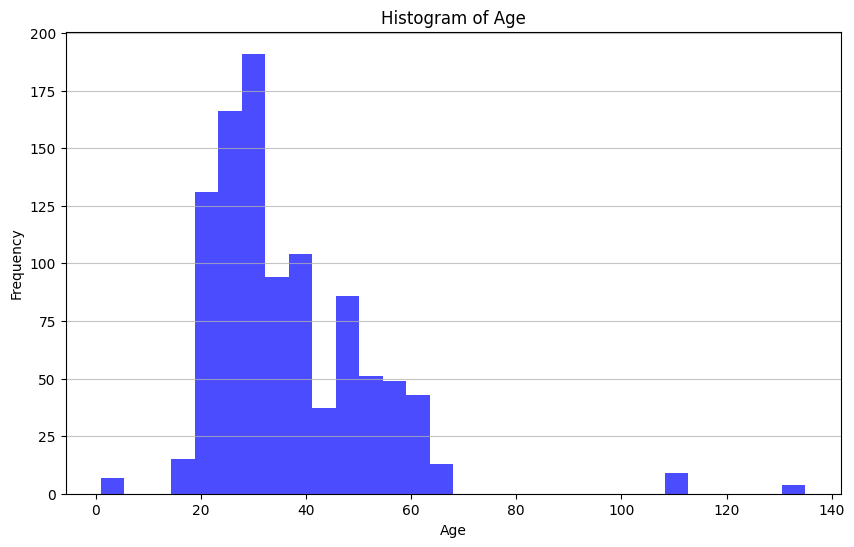

In [45]:
## Plot histogram of age using matplotlib
plt.figure(figsize=(10, 6))
plt.hist(df_cust.age, bins=30, color='blue', alpha=0.7)
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()



In [46]:
## Business requirements: age should be between 15 and 80

df_cust[(df_cust.age <= 15)]

,cust_id,name,gender,age,location,occupation,annual_income,marital_status
0,1,Manya Acharya,Female,2,City,Business Owner,358211.0,Married
165,166,Sia Dutta,Female,1,City,Freelancer,39721.0,Single
295,296,Ayush Pandey,Male,1,Rural,Accountant,55254.0,Married
692,693,Dhruv Jha,Male,1,City,Business Owner,83045.0,Married
845,846,Rohan Jaiswal,Male,1,City,Consultant,20838.0,Married
855,856,Aanya Taneja,Female,2,City,Fullstack Developer,30689.0,Married
895,896,Krishna Goswami,Male,1,City,Freelancer,31533.0,Married


In [47]:
df_cust[(df_cust.age >= 80)]

,cust_id,name,gender,age,location,occupation,annual_income,marital_status
41,42,Aaryan Shah,Male,110,City,Artist,7621.0,Married
174,175,Rohan Sharma,Male,110,City,Freelancer,23723.0,Married
222,223,Arjun Batra,Male,110,Suburb,Freelancer,210987.0,Married
277,278,Aarav Tandon,Male,110,City,Consultant,96522.0,Single
325,326,Virat Goel,Male,110,City,Accountant,61021.0,Single
610,611,Rehan Verma,Male,135,Rural,Business Owner,444776.0,Married
703,704,Aanya Sharma,Female,110,City,Freelancer,43404.0,Single
709,710,Anika Verma,Female,110,City,Data Scientist,98417.0,Married
728,729,Rehan Yadav,Male,135,City,Business Owner,382836.0,Married
832,833,Ridhi Raj,Female,110,City,Fullstack Developer,95379.0,Single


In [48]:
df_cust[(df_cust.age <= 15)].shape, df_cust[(df_cust.age >= 80)].shape

((7, 8), (13, 8))

In [49]:
df_cust[(df_cust.age <= 15) | (df_cust.age >= 80)]

,cust_id,name,gender,age,location,occupation,annual_income,marital_status
0,1,Manya Acharya,Female,2,City,Business Owner,358211.0,Married
41,42,Aaryan Shah,Male,110,City,Artist,7621.0,Married
165,166,Sia Dutta,Female,1,City,Freelancer,39721.0,Single
174,175,Rohan Sharma,Male,110,City,Freelancer,23723.0,Married
222,223,Arjun Batra,Male,110,Suburb,Freelancer,210987.0,Married
277,278,Aarav Tandon,Male,110,City,Consultant,96522.0,Single
295,296,Ayush Pandey,Male,1,Rural,Accountant,55254.0,Married
325,326,Virat Goel,Male,110,City,Accountant,61021.0,Single
610,611,Rehan Verma,Male,135,Rural,Business Owner,444776.0,Married
692,693,Dhruv Jha,Male,1,City,Business Owner,83045.0,Married


In [50]:
df_cust[(df_cust.age <= 15) | (df_cust.age >= 80)].shape    

(20, 8)

In [51]:
df_cust.age.mean()

np.float64(36.405)

In [52]:
occupation_median_age_per_occupation = df_cust.groupby('occupation')['age'].median()
occupation_median_age_per_occupation

occupation
Accountant             31.5
Artist                 26.0
Business Owner         51.0
Consultant             46.0
Data Scientist         32.0
Freelancer             24.0
Fullstack Developer    27.5
Name: age, dtype: float64

In [53]:
outliers = df_cust[(df_cust.age <= 15) | (df_cust.age >= 80)]
outliers.head()


,cust_id,name,gender,age,location,occupation,annual_income,marital_status
0,1,Manya Acharya,Female,2,City,Business Owner,358211.0,Married
41,42,Aaryan Shah,Male,110,City,Artist,7621.0,Married
165,166,Sia Dutta,Female,1,City,Freelancer,39721.0,Single
174,175,Rohan Sharma,Male,110,City,Freelancer,23723.0,Married
222,223,Arjun Batra,Male,110,Suburb,Freelancer,210987.0,Married


In [54]:
for index, row in outliers.iterrows():
    if row['age'] <= 15 or row['age'] >= 80:
        df_cust.at[index, 'age'] = occupation_median_age_per_occupation[row['occupation']]

df_cust.age.describe()

C:\Users\Suraj Khodade\AppData\Local\Temp\ipykernel_11128\2929825177.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '31.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_cust.at[index, 'age'] = occupation_median_age_per_occupation[row['occupation']]


count    1000.000000
mean       35.541500
std        12.276634
min        18.000000
25%        26.000000
50%        32.000000
75%        44.250000
max        64.000000
Name: age, dtype: float64

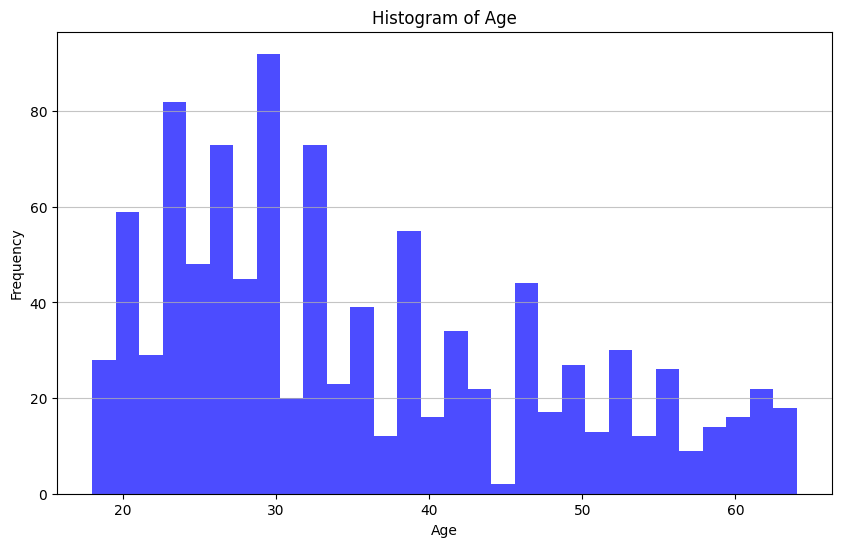

In [55]:
## Plot histogram of age using matplotlib
plt.figure(figsize=(10, 6))
plt.hist(df_cust.age, bins=30, color='blue', alpha=0.7)
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()




### 05 Data Visualization - Age, Gender, Location

Requirements:
1. Analyze customer distribution per age group. Form the following age groups:
   a. Youngsters 18 - 25
   b. Mid Age Proffessionals 26 - 48
   c. Senior 49 - 65
2. Analyze the customer distribution per location and gender.



In [56]:
## to age groups we will create a new column 'age_group' in the df_cust DataFrame

def get_age_group(age):
    if 18 <= age <= 25:
        return '18-25'
    elif 26 <= age <= 48:
        return '26-48'
    elif 49 <= age <= 65:
        return '49-65'
    else:
        return 'Other'

In [57]:
df_cust['age_group'] = df_cust['age'].apply(get_age_group)

In [58]:
df_cust.head()

,cust_id,name,gender,age,location,occupation,annual_income,marital_status,age_group
0,1,Manya Acharya,Female,51.0,City,Business Owner,358211.0,Married,49-65
1,2,Anjali Pandey,Female,47.0,City,Consultant,65172.0,Single,26-48
2,3,Aaryan Chauhan,Male,21.0,City,Freelancer,22378.0,Married,18-25
3,4,Rudra Bali,Male,24.0,Rural,Freelancer,33563.0,Married,18-25
4,5,Advait Malik,Male,48.0,City,Consultant,39406.0,Married,26-48


In [59]:
# Define the bin edges and labels
bin_edges = [17, 25, 48, 65]  # Adjust as needed
bin_labels = ['18-25', '26-48', '49-65']

# Use the cut function to bin and label the age column
df_cust['age_group_cut'] = pd.cut(df_cust['age'], bins=bin_edges, labels=bin_labels)

In [60]:
df_cust.head()

,cust_id,name,gender,age,location,occupation,annual_income,marital_status,age_group,age_group_cut
0,1,Manya Acharya,Female,51.0,City,Business Owner,358211.0,Married,49-65,49-65
1,2,Anjali Pandey,Female,47.0,City,Consultant,65172.0,Single,26-48,26-48
2,3,Aaryan Chauhan,Male,21.0,City,Freelancer,22378.0,Married,18-25,18-25
3,4,Rudra Bali,Male,24.0,Rural,Freelancer,33563.0,Married,18-25,18-25
4,5,Advait Malik,Male,48.0,City,Consultant,39406.0,Married,26-48,26-48


In [61]:
## take counts for each age group
age_group_counts = df_cust['age_group'].value_counts().sort_index()
age_group_counts

age_group
18-25    246
26-48    567
49-65    187
Name: count, dtype: int64

In [62]:
## find percentage of each age group
age_group_counts = df_cust['age_group'].value_counts(normalize=True).sort_index() * 100
age_group_counts

age_group
18-25    24.6
26-48    56.7
49-65    18.7
Name: proportion, dtype: float64

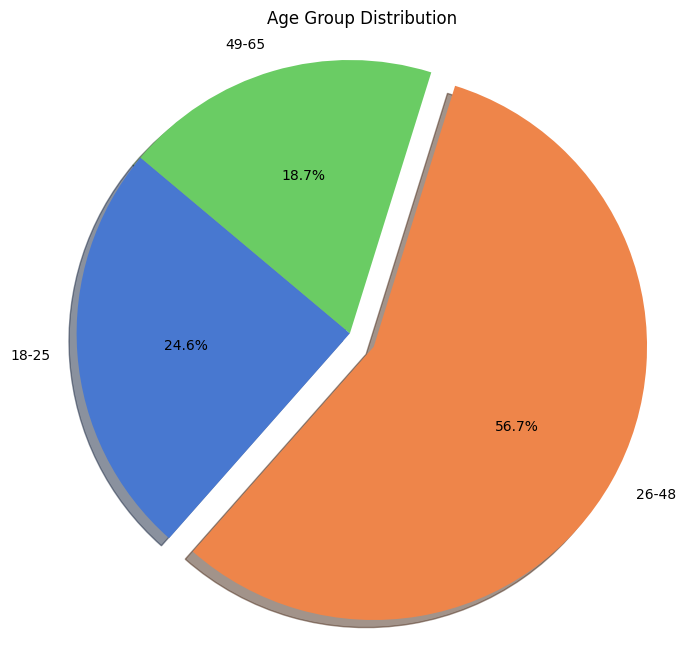

In [63]:
## Plot pie chart for age group distribution
plt.figure(figsize=(8, 8))
plt.pie(age_group_counts, labels=age_group_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('muted'),
shadow=True,
explode=(0, 0.1, 0)
)
plt.title('Age Group Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that pie chart is a circle.
plt.show()


In [64]:
df_cust.location.value_counts()

location
City      683
Suburb    232
Rural      85
Name: count, dtype: int64

In [65]:
df_cust.gender.value_counts()

gender
Male      674
Female    326
Name: count, dtype: int64

In [66]:
df_cust.groupby(['location', 'gender']).size()

location  gender
City      Female    226
          Male      457
Rural     Female     26
          Male       59
Suburb    Female     74
          Male      158
dtype: int64

In [67]:
cust_location_age =  df_cust.groupby(['location', 'gender']).size().unstack()
cust_location_age

gender,Female,Male
location,,
City,226,457
Rural,26,59
Suburb,74,158


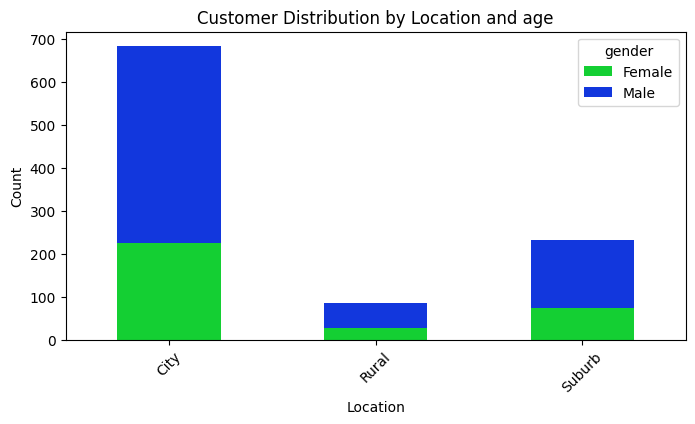

In [68]:
cust_location_age.plot(kind='bar', stacked=True, figsize=(8, 4), color=["#14cf33", "#1237dd"])
plt.title('Customer Distribution by Location and age')
plt.xlabel('Location')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

### 06 Data Cleaning - Credit Score 

In [69]:
df_cs.head()    

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit
0,1,749,0.585171,19571.0,0.0,40000.0
1,2,587,0.107928,161644.0,2.0,1250.0
2,3,544,0.854807,513.0,4.0,1000.0
3,4,504,0.336938,224.0,2.0,1000.0
4,5,708,0.586151,18090.0,2.0,40000.0


In [70]:
df_cs.shape

(1004, 6)

In [71]:
## If you observ in customer table has 1000 records, but in credit score table has 1004 records. So we need to check the records in credit score table which are not present in customer table
df_cust.shape, df_cs.shape

((1000, 10), (1004, 6))

In [72]:
## find unique customer IDs 
df_cs['cust_id'].nunique()

1000

In [73]:
## find duplicate customer IDs in credit score table
df_cs[df_cs['cust_id'].duplicated(keep=False)]

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit
516,517,308,NaN,NaN,NaN,NaN
517,517,308,0.113860,33.0,3.0,500.0
569,569,344,NaN,NaN,NaN,NaN
570,569,344,0.112599,37.0,0.0,500.0
607,606,734,NaN,NaN,NaN,NaN
608,606,734,0.193418,4392.0,1.0,40000.0
664,662,442,NaN,NaN,NaN,NaN
665,662,442,0.856039,266.0,2.0,500.0


In [74]:
## drop duplicate customer IDs in credit score table
df_cs_clean1 = df_cs.drop_duplicates(subset='cust_id', keep='last')
df_cs_clean1.shape

(1000, 6)

In [75]:
## check duplicate in cleaned credit score table
df_cs_clean1[df_cs_clean1['cust_id'].duplicated(keep=False)]

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit


In [76]:
## check null
df_cs_clean1.isnull().sum()

cust_id                            0
credit_score                       0
credit_utilisation                 0
outstanding_debt                   0
credit_inquiries_last_6_months     0
credit_limit                      65
dtype: int64

In [77]:
## We can see credit_limit has some null values

df_cs_clean1.credit_limit.value_counts()

credit_limit
500.0      229
60000.0    186
40000.0    137
1500.0     100
1000.0      90
750.0       76
1250.0      75
20000.0     42
Name: count, dtype: int64

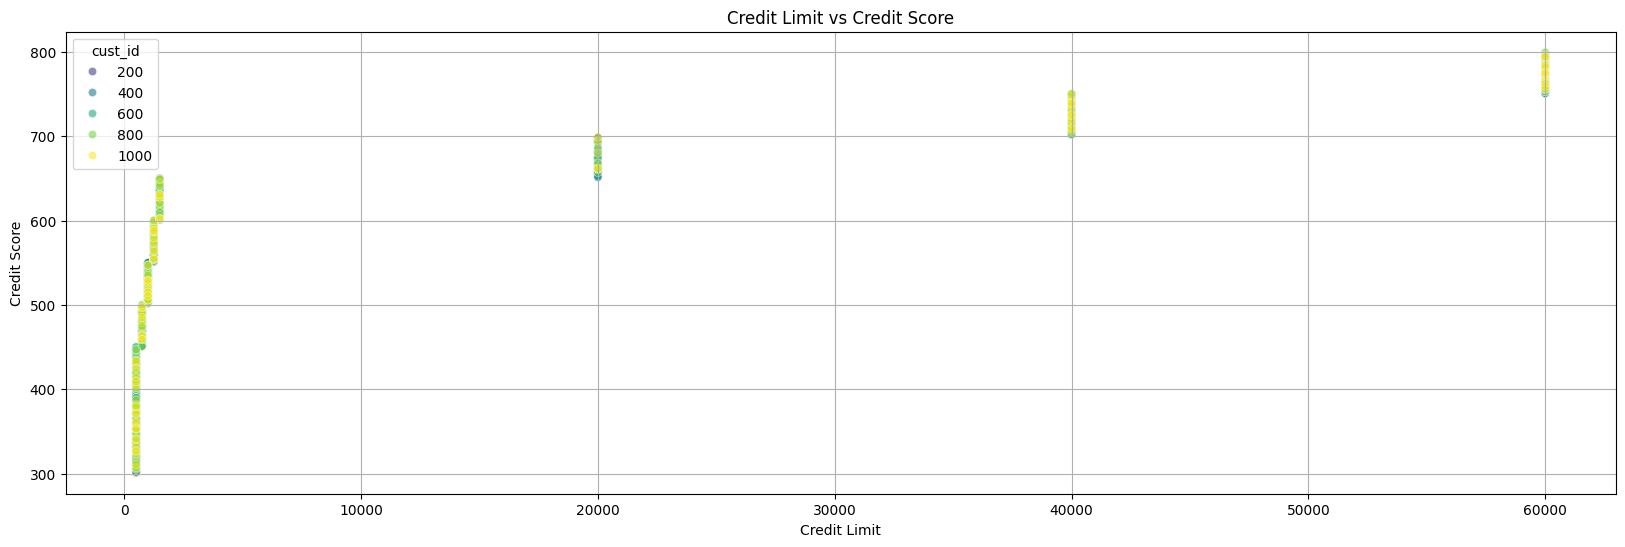

In [78]:
## plot scatter plot for credit_limit vs credit_score
plt.figure(figsize=(20, 6))
sns.scatterplot(x='credit_limit', y='credit_score', data=df_cs_clean1,
                    hue='cust_id', palette='viridis', alpha=0.6)
plt.title('Credit Limit vs Credit Score')
plt.xlabel('Credit Limit')
plt.ylabel('Credit Score')
plt.grid(True)
plt.show()


In [79]:
# Define bin ranges
bin_ranges = [300, 450, 500, 550, 600, 650, 700, 750, 800]

# Create labels for the bins
bin_labels = [f'{start}-{end-1}' for start, end in zip(bin_ranges, bin_ranges[1:])]

# Use pd.cut to assign data to bins
df_cs_clean1['credit_score_range'] = pd.cut(df_cs_clean1['credit_score'], bins=bin_ranges, labels=bin_labels, include_lowest=True, right=False)

C:\Users\Suraj Khodade\AppData\Local\Temp\ipykernel_11128\4217223635.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cs_clean1['credit_score_range'] = pd.cut(df_cs_clean1['credit_score'], bins=bin_ranges, labels=bin_labels, include_lowest=True, right=False)


In [80]:
df_cs_clean1.head()

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit,credit_score_range
0,1,749,0.585171,19571.0,0.0,40000.0,700-749
1,2,587,0.107928,161644.0,2.0,1250.0,550-599
2,3,544,0.854807,513.0,4.0,1000.0,500-549
3,4,504,0.336938,224.0,2.0,1000.0,500-549
4,5,708,0.586151,18090.0,2.0,40000.0,700-749


In [81]:
    # Print all the creadit score ranges
df_cs_clean1['credit_score_range'].value_counts().sort_index()

credit_score_range
300-449    237
450-499     82
500-549     95
550-599     80
600-649    105
650-699     46
700-749    142
750-799    213
Name: count, dtype: int64

In [82]:
## To replace with null, we can find more frequent credit score limit for each credit score range and replace the null values with that limit
## In short we can replace the null values in credit_limit column with the mode based on the credit score range
credit_score_mode = df_cs_clean1.groupby('credit_score_range')['credit_limit'].agg(lambda x: x.mode()[0] if not x.mode().empty else np.nan)

credit_score_mode

C:\Users\Suraj Khodade\AppData\Local\Temp\ipykernel_11128\995161657.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  credit_score_mode = df_cs_clean1.groupby('credit_score_range')['credit_limit'].agg(lambda x: x.mode()[0] if not x.mode().empty else np.nan)


credit_score_range
300-449      500.0
450-499      750.0
500-549     1000.0
550-599     1250.0
600-649     1500.0
650-699    20000.0
700-749    40000.0
750-799    60000.0
Name: credit_limit, dtype: float64

In [83]:
## convert to dataframe
mode_df = credit_score_mode.reset_index()
mode_df

,credit_score_range,credit_limit
0,300-449,500.0
1,450-499,750.0
2,500-549,1000.0
3,550-599,1250.0
4,600-649,1500.0
5,650-699,20000.0
6,700-749,40000.0
7,750-799,60000.0


In [84]:
## We can replace, for this we can use merge to join the mode_df with df_cs_clean1 on credit_score_range and then fill the null values in credit_limit column with the mode value
df_cs_clean_2 = df_cs_clean1.merge(mode_df, on='credit_score_range', how='left', suffixes=('', '_mode'))

In [85]:
df_cs_clean_2.isnull().sum()

cust_id                            0
credit_score                       0
credit_utilisation                 0
outstanding_debt                   0
credit_inquiries_last_6_months     0
credit_limit                      65
credit_score_range                 0
credit_limit_mode                  0
dtype: int64

In [86]:
df_cs_clean_2[df_cs_clean_2['credit_limit'].isnull()]

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit,credit_score_range,credit_limit_mode
10,11,679,0.557450,9187.0,2.0,NaN,650-699,20000.0
35,36,790,0.112535,4261.0,1.0,NaN,750-799,60000.0
37,38,514,0.296971,238.0,2.0,NaN,500-549,1000.0
45,46,761,0.596041,24234.0,2.0,NaN,750-799,60000.0
64,65,734,0.473715,13631.0,0.0,NaN,700-749,40000.0
...,...,...,...,...,...,...,...,...
908,909,479,0.487555,320.0,3.0,NaN,450-499,750.0
927,928,311,0.832244,316.0,2.0,NaN,300-449,500.0
944,945,526,0.272734,227.0,1.0,NaN,500-549,1000.0
950,951,513,0.175914,131.0,3.0,NaN,500-549,1000.0


In [87]:
## replce null values in credit_limit column with the mode value
df_cs_clean_3 = df_cs_clean_2.copy()
df_cs_clean_3['credit_limit'] = df_cs_clean_3['credit_limit'].fillna(df_cs_clean_3['credit_limit_mode'])

In [88]:
df_cs_clean_3.isnull().sum() 

## no null values in credit_limit column after replacing with mode value

cust_id                           0
credit_score                      0
credit_utilisation                0
outstanding_debt                  0
credit_inquiries_last_6_months    0
credit_limit                      0
credit_score_range                0
credit_limit_mode                 0
dtype: int64

In [89]:
#Lets check other checks
df_cs_clean_3.describe()

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit,credit_limit_mode
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000
mean,500.500000,589.182000,0.498950,9683.597000,1.955000,19733.75000,19912.500000
std,288.819436,152.284929,0.233139,25255.893671,1.414559,24717.43818,24840.914633
min,1.000000,300.000000,0.103761,33.000000,0.000000,500.00000,500.000000
25%,250.750000,460.000000,0.293917,221.000000,1.000000,750.00000,750.000000
50%,500.500000,601.500000,0.487422,550.000000,2.000000,1500.00000,1500.000000
75%,750.250000,738.000000,0.697829,11819.500000,3.000000,40000.00000,40000.000000
max,1000.000000,799.000000,0.899648,209901.000000,4.000000,60000.00000,60000.000000


Text(0.5, 1.0, 'Box plot for outstanding debt')

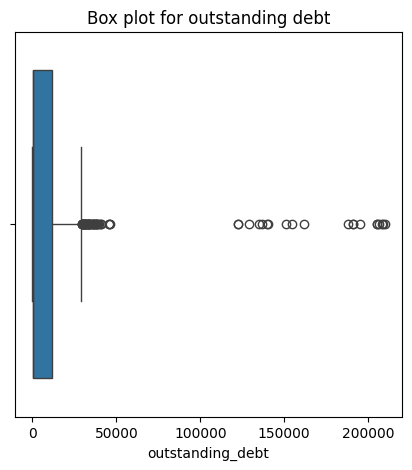

In [90]:
plt.figure(figsize=(5, 5))
sns.boxplot(x=df_cs_clean_3['outstanding_debt'])
plt.title('Box plot for outstanding debt')

In [91]:
## Find out outstanding_debt is greater than credit_limit
df_cs_clean_3[df_cs_clean_3.outstanding_debt>df_cs_clean_3.credit_limit]

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit,credit_score_range,credit_limit_mode
1,2,587,0.107928,161644.0,2.0,1250.0,550-599,1250.0
19,20,647,0.439132,205014.0,3.0,1500.0,600-649,1500.0
25,26,758,0.250811,190838.0,2.0,60000.0,750-799,60000.0
38,39,734,0.573023,122758.0,3.0,40000.0,700-749,40000.0
93,94,737,0.739948,137058.0,2.0,40000.0,700-749,40000.0
204,205,303,0.364360,187849.0,0.0,500.0,300-449,500.0
271,272,703,0.446886,154568.0,1.0,40000.0,700-749,40000.0
301,302,722,0.608076,122402.0,4.0,40000.0,700-749,40000.0
330,331,799,0.363420,208898.0,4.0,60000.0,750-799,60000.0
350,351,320,0.285081,150860.0,0.0,500.0,300-449,500.0


In [92]:
#We will replace these outliers with credit_limit. We can assume that there was some data processing error due to we got these high numbers and it is ok to replace them with a credit_limit
df_cs_clean_3.loc[df_cs_clean_3['outstanding_debt'] > df_cs_clean_3['credit_limit'], 'outstanding_debt']

1      161644.0
19     205014.0
25     190838.0
38     122758.0
93     137058.0
204    187849.0
271    154568.0
301    122402.0
330    208898.0
350    150860.0
446    206191.0
544    135112.0
636    140063.0
646    128818.0
698    190717.0
723    140008.0
725    205404.0
730    209901.0
766    195004.0
862    208406.0
Name: outstanding_debt, dtype: float64

In [93]:
## Replace outliers in outstanding_debt with credit_limit
df_cs_clean_3.loc[df_cs_clean_3['outstanding_debt'] > df_cs_clean_3['credit_limit'], 'outstanding_debt'] = df_cs_clean_3['credit_limit']

In [94]:
df_cs_clean_3[df_cs_clean_3.outstanding_debt>df_cs_clean_3.credit_limit]

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit,credit_score_range,credit_limit_mode


### 07 Correlation among credit profile

In [95]:
df_cs_clean_3.head()

,cust_id,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit,credit_score_range,credit_limit_mode
0,1,749,0.585171,19571.0,0.0,40000.0,700-749,40000.0
1,2,587,0.107928,1250.0,2.0,1250.0,550-599,1250.0
2,3,544,0.854807,513.0,4.0,1000.0,500-549,1000.0
3,4,504,0.336938,224.0,2.0,1000.0,500-549,1000.0
4,5,708,0.586151,18090.0,2.0,40000.0,700-749,40000.0


In [96]:
df_cust.head()

,cust_id,name,gender,age,location,occupation,annual_income,marital_status,age_group,age_group_cut
0,1,Manya Acharya,Female,51.0,City,Business Owner,358211.0,Married,49-65,49-65
1,2,Anjali Pandey,Female,47.0,City,Consultant,65172.0,Single,26-48,26-48
2,3,Aaryan Chauhan,Male,21.0,City,Freelancer,22378.0,Married,18-25,18-25
3,4,Rudra Bali,Male,24.0,Rural,Freelancer,33563.0,Married,18-25,18-25
4,5,Advait Malik,Male,48.0,City,Consultant,39406.0,Married,26-48,26-48


In [97]:
## Merge df_cust and df_cs_clean_3 on cust_id
df_merged = pd.merge(df_cust, df_cs_clean_3, on='cust_id', how='inner')
df_merged.head()

,cust_id,name,gender,age,location,occupation,annual_income,marital_status,age_group,age_group_cut,credit_score,credit_utilisation,outstanding_debt,credit_inquiries_last_6_months,credit_limit,credit_score_range,credit_limit_mode
0,1,Manya Acharya,Female,51.0,City,Business Owner,358211.0,Married,49-65,49-65,749,0.585171,19571.0,0.0,40000.0,700-749,40000.0
1,2,Anjali Pandey,Female,47.0,City,Consultant,65172.0,Single,26-48,26-48,587,0.107928,1250.0,2.0,1250.0,550-599,1250.0
2,3,Aaryan Chauhan,Male,21.0,City,Freelancer,22378.0,Married,18-25,18-25,544,0.854807,513.0,4.0,1000.0,500-549,1000.0
3,4,Rudra Bali,Male,24.0,Rural,Freelancer,33563.0,Married,18-25,18-25,504,0.336938,224.0,2.0,1000.0,500-549,1000.0
4,5,Advait Malik,Male,48.0,City,Consultant,39406.0,Married,26-48,26-48,708,0.586151,18090.0,2.0,40000.0,700-749,40000.0


In [98]:
## Find correlation between credit_score and credit_limit
correlation = df_merged[['credit_score', 'credit_limit']].corr()
correlation

,credit_score,credit_limit
credit_score,1.000000,0.847952
credit_limit,0.847952,1.000000


In [99]:
## Do correlation between all numerical columns
numerical_cols = ['credit_score', 'credit_utilisation', 'outstanding_debt', 'credit_limit', 'annual_income','age']

correlation_matrix = df_merged[numerical_cols].corr()
correlation_matrix


,credit_score,credit_utilisation,outstanding_debt,credit_limit,annual_income,age
credit_score,1.000000,-0.070445,0.680654,0.847952,0.575685,0.444917
credit_utilisation,-0.070445,1.000000,0.192838,-0.080493,-0.086816,-0.027713
outstanding_debt,0.680654,0.192838,1.000000,0.810581,0.555077,0.444301
credit_limit,0.847952,-0.080493,0.810581,1.000000,0.684627,0.510993
annual_income,0.575685,-0.086816,0.555077,0.684627,1.000000,0.618136
age,0.444917,-0.027713,0.444301,0.510993,0.618136,1.000000


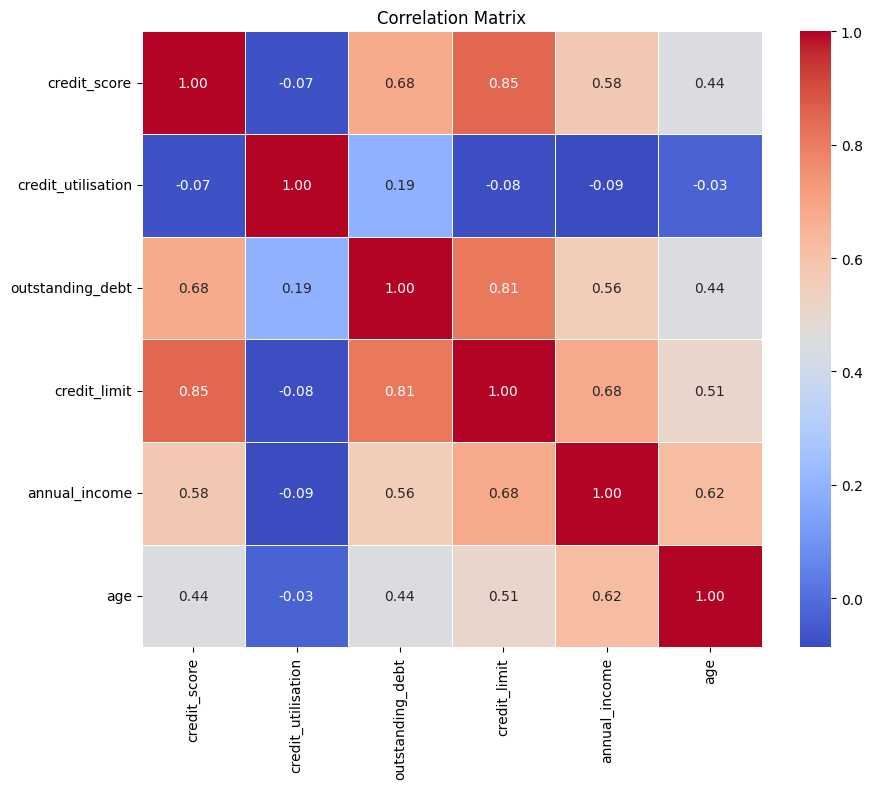

In [100]:
## plot heatmap for correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')

plt.show()


### 08 Data Cleaning - Transaction Data

In [101]:
df_trans.head()

,tran_id,cust_id,tran_date,tran_amount,platform,product_category,payment_type
0,1,705,2023-01-01,63,Flipkart,Electronics,Phonepe
1,2,385,2023-01-01,99,Alibaba,Fashion & Apparel,Credit Card
2,3,924,2023-01-01,471,Shopify,Sports,Phonepe
3,4,797,2023-01-01,33,Shopify,Fashion & Apparel,Gpay
4,5,482,2023-01-01,68,Amazon,Fashion & Apparel,Net Banking


In [102]:
df_trans.isnull().sum()

tran_id                0
cust_id                0
tran_date              0
tran_amount            0
platform            4941
product_category       0
payment_type           0
dtype: int64

In [103]:
## check null records in transaction data
df_trans[df_trans.platform.isnull()]

,tran_id,cust_id,tran_date,tran_amount,platform,product_category,payment_type
355,356,58,2023-01-01,237,None,Electronics,Net Banking
418,419,383,2023-01-01,338,None,Electronics,Credit Card
607,608,421,2023-01-01,700,None,Electronics,Phonepe
844,845,945,2023-01-01,493,None,Sports,Credit Card
912,913,384,2023-01-01,85,None,Fashion & Apparel,Phonepe
...,...,...,...,...,...,...,...
499579,499580,924,2023-09-05,31,None,Fashion & Apparel,Gpay
499646,499647,944,2023-09-05,58445,None,Fashion & Apparel,Phonepe
499725,499726,620,2023-09-05,15,None,Sports,Net Banking
499833,499834,616,2023-09-05,97,None,Fashion & Apparel,Credit Card


In [104]:
## find unique platforms
df_trans.platform.unique()

array(['Flipkart', 'Alibaba', 'Shopify', 'Amazon', 'Ebay', 'Meesho',
       'Cred', None], dtype=object)

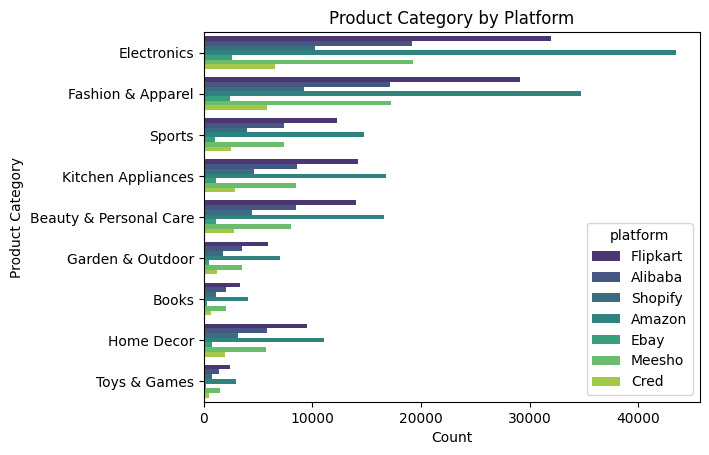

In [105]:
## Plot contert for each platform against product_category
sns.countplot(y ='product_category', hue='platform', data=df_trans, palette='viridis')
plt.title('Product Category by Platform')
plt.xlabel('Count')
plt.ylabel('Product Category')
plt.show()


In [106]:
## draw bar chart for product_category by platform

value_counts = df_trans['platform'].value_counts()
value_counts

platform
Amazon      151443
Flipkart    122660
Alibaba      73584
Meesho       73271
Shopify      39416
Cred         24741
Ebay          9944
Name: count, dtype: int64

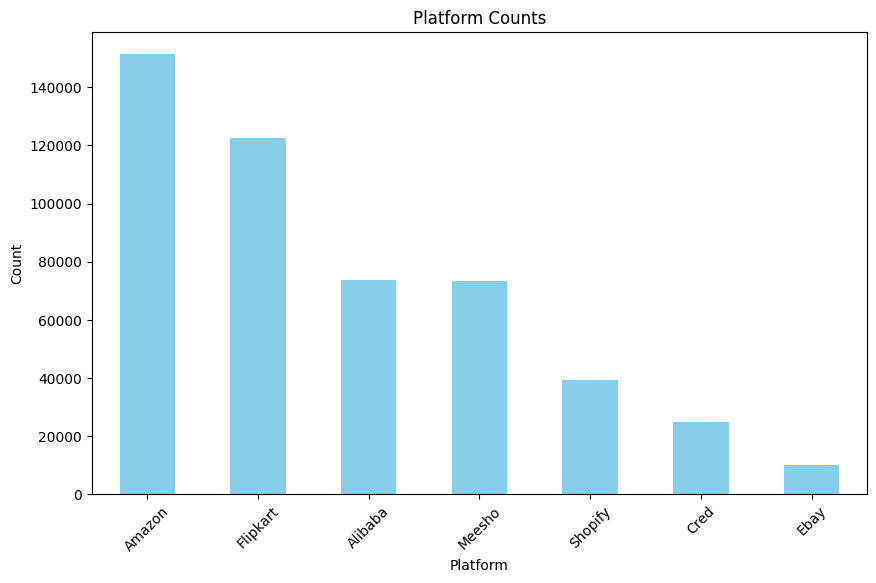

In [107]:
## draw bar for value counts
value_counts.plot(kind='bar', figsize=(10, 6), color='skyblue')
plt.title('Platform Counts')
plt.xlabel('Platform')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [108]:
##In the above chart, you can see that in all product categories Amazon is the platform that is used the most for making purchases. For handling null values in platform may be we can just replace them using "Amazon" as a product platform just because it is used most frequently
## Let's check Mode for platform
df_trans.platform.mode()

0    Amazon
Name: platform, dtype: object

In [109]:
## Replace null values in platform column with mode value
df_trans['platform'].fillna(df_trans.platform.mode()[0], inplace=True)

C:\Users\Suraj Khodade\AppData\Local\Temp\ipykernel_11128\2682099367.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_trans['platform'].fillna(df_trans.platform.mode()[0], inplace=True)


In [110]:
df_trans.isnull().sum()

tran_id             0
cust_id             0
tran_date           0
tran_amount         0
platform            0
product_category    0
payment_type        0
dtype: int64

### 09 Data Cleaning - Transaction Data - Remove outliers

In [111]:
df_trans.head()

,tran_id,cust_id,tran_date,tran_amount,platform,product_category,payment_type
0,1,705,2023-01-01,63,Flipkart,Electronics,Phonepe
1,2,385,2023-01-01,99,Alibaba,Fashion & Apparel,Credit Card
2,3,924,2023-01-01,471,Shopify,Sports,Phonepe
3,4,797,2023-01-01,33,Shopify,Fashion & Apparel,Gpay
4,5,482,2023-01-01,68,Amazon,Fashion & Apparel,Net Banking


In [112]:

df_trans.describe()

,tran_id,cust_id,tran_amount
count,500000.000000,500000.000000,500000.00000
mean,250000.500000,501.400428,3225.20733
std,144337.711635,288.641924,13098.74276
min,1.000000,1.000000,0.00000
25%,125000.750000,252.000000,64.00000
50%,250000.500000,502.000000,141.00000
75%,375000.250000,752.000000,397.00000
max,500000.000000,1000.000000,69999.00000


In [113]:
## find df with zero tran_amount
df_trans_zero = df_trans[df_trans.tran_amount == 0]
df_trans_zero 

,tran_id,cust_id,tran_date,tran_amount,platform,product_category,payment_type
120,121,440,2023-01-01,0,Amazon,Electronics,Credit Card
141,142,839,2023-01-01,0,Amazon,Electronics,Credit Card
517,518,147,2023-01-01,0,Amazon,Electronics,Credit Card
533,534,891,2023-01-01,0,Amazon,Electronics,Credit Card
586,587,108,2023-01-01,0,Amazon,Electronics,Credit Card
...,...,...,...,...,...,...,...
499326,499327,695,2023-09-05,0,Amazon,Electronics,Credit Card
499494,499495,295,2023-09-05,0,Amazon,Electronics,Credit Card
499708,499709,141,2023-09-05,0,Amazon,Electronics,Credit Card
499928,499929,4,2023-09-05,0,Amazon,Electronics,Credit Card


In [114]:
df_trans_zero.shape

(4734, 7)

In [115]:
df_trans_zero.platform.value_counts()

platform
Amazon    4734
Name: count, dtype: int64

In [116]:
df_trans_zero.product_category.value_counts()

product_category
Electronics    4734
Name: count, dtype: int64

In [117]:
df_trans_zero.payment_type.value_counts()

payment_type
Credit Card    4734
Name: count, dtype: int64

In [118]:
df_trans_zero[['platform', 'product_category', 'payment_type']].value_counts()

platform  product_category  payment_type
Amazon    Electronics       Credit Card     4734
Name: count, dtype: int64

In [119]:
## It appears that when platform=Amazon, product_category=Eletronics and payment_type=Credit Card, at that time we get all these zero transactions. We need to find other transactions in this group and find its median to replace these zero values. We are not using mean because we can see some outliers as well in this column

In [120]:
df_trans_1 = df_trans[(df_trans.platform=='Amazon')&(df_trans.product_category=="Electronics")&(df_trans.payment_type=="Credit Card")]
df_trans_1.shape

(15637, 7)

In [121]:
df_trans_1[df_trans_1.tran_amount>0]

,tran_id,cust_id,tran_date,tran_amount,platform,product_category,payment_type
109,110,887,2023-01-01,635,Amazon,Electronics,Credit Card
173,174,676,2023-01-01,60439,Amazon,Electronics,Credit Card
190,191,763,2023-01-01,697,Amazon,Electronics,Credit Card
263,264,528,2023-01-01,421,Amazon,Electronics,Credit Card
311,312,936,2023-01-01,537,Amazon,Electronics,Credit Card
...,...,...,...,...,...,...,...
499766,499767,723,2023-09-05,909,Amazon,Electronics,Credit Card
499793,499794,586,2023-09-05,304,Amazon,Electronics,Credit Card
499812,499813,688,2023-09-05,425,Amazon,Electronics,Credit Card
499860,499861,373,2023-09-05,480,Amazon,Electronics,Credit Card


In [122]:
## Find median of tran_amount for this group
median_to_replace = df_trans_1[df_trans_1.tran_amount>0].tran_amount.median()
median_to_replace

np.float64(554.0)

In [123]:
## Replace zero values in tran_amount column with median value
df_trans['tran_amount'].replace(0,median_to_replace, inplace=True)

C:\Users\Suraj Khodade\AppData\Local\Temp\ipykernel_11128\650625168.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_trans['tran_amount'].replace(0,median_to_replace, inplace=True)


In [124]:
df_trans[df_trans.tran_amount==0]

,tran_id,cust_id,tran_date,tran_amount,platform,product_category,payment_type


In [125]:
df_trans.tran_amount.describe()

count    500000.000000
mean       3230.452602
std       13097.561071
min           2.000000
25%          66.000000
50%         146.000000
75%         413.000000
max       69999.000000
Name: tran_amount, dtype: float64

<Axes: xlabel='tran_amount', ylabel='Count'>

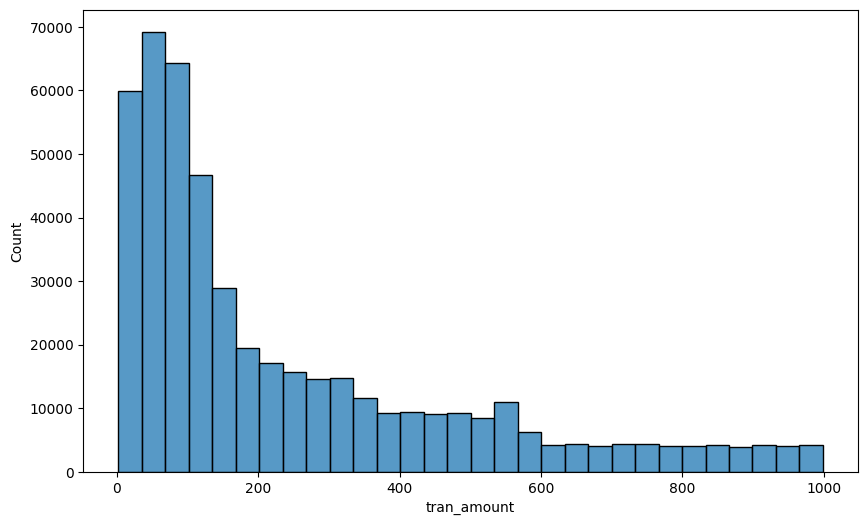

In [126]:
## Check distribution of tran_amount
plt.figure(figsize=(10, 6))
sns.histplot(df_trans[df_trans.tran_amount < 1000].tran_amount, bins=30, kde=False)

In [127]:
## Caluculate IQR
q1,q2 = df_trans.tran_amount.quantile([0.25, 0.75])
q1, q2

(66.0, 413.0)

In [128]:
IQR = q2 - q1
IQR

347.0

In [129]:
lower= q1 - 1.5 * IQR
upper = q2 + 1.5 * IQR
lower, upper

(-454.5, 933.5)

In [130]:
## WE dcided to use 2 times IQR to remove outliers
lower= q1 - 2 * IQR 
upper = q2 + 2 * IQR
lower, upper

(-628.0, 1107.0)

In [131]:
# find outliers in tran_amount
df_trans_outliers =  df_trans[df_trans.tran_amount > upper]
df_trans_outliers.shape

(25000, 7)

In [132]:
df_trans_normal = df_trans[df_trans.tran_amount<upper]
df_trans_normal

,tran_id,cust_id,tran_date,tran_amount,platform,product_category,payment_type
0,1,705,2023-01-01,63,Flipkart,Electronics,Phonepe
1,2,385,2023-01-01,99,Alibaba,Fashion & Apparel,Credit Card
2,3,924,2023-01-01,471,Shopify,Sports,Phonepe
3,4,797,2023-01-01,33,Shopify,Fashion & Apparel,Gpay
4,5,482,2023-01-01,68,Amazon,Fashion & Apparel,Net Banking
...,...,...,...,...,...,...,...
499994,499995,679,2023-09-05,59,Ebay,Beauty & Personal Care,Gpay
499995,499996,791,2023-09-05,43,Amazon,Books,Phonepe
499997,499998,57,2023-09-05,224,Amazon,Garden & Outdoor,Phonepe
499998,499999,629,2023-09-05,538,Flipkart,Home Decor,Gpay


In [133]:
tran_mean_per_category = df_trans_normal.groupby("product_category")["tran_amount"].mean()
tran_mean_per_category

product_category
Beauty & Personal Care     92.167205
Books                      29.553515
Electronics               510.172685
Fashion & Apparel          64.553463
Garden & Outdoor          125.630277
Home Decor                302.487561
Kitchen Appliances        176.773288
Sports                    269.181631
Toys & Games               50.333298
Name: tran_amount, dtype: float64

In [134]:
df_trans.loc[df_trans_outliers.index]

,tran_id,cust_id,tran_date,tran_amount,platform,product_category,payment_type
26,27,380,2023-01-01,61963,Shopify,Beauty & Personal Care,Credit Card
49,50,287,2023-01-01,57869,Amazon,Toys & Games,Gpay
94,95,770,2023-01-01,52881,Ebay,Kitchen Appliances,Credit Card
104,105,549,2023-01-01,58574,Flipkart,Fashion & Apparel,Gpay
113,114,790,2023-01-01,51669,Shopify,Kitchen Appliances,Credit Card
...,...,...,...,...,...,...,...
499742,499743,868,2023-09-05,55131,Meesho,Fashion & Apparel,Gpay
499888,499889,614,2023-09-05,59679,Meesho,Fashion & Apparel,Net Banking
499900,499901,811,2023-09-05,60184,Flipkart,Sports,Debit Card
499966,499967,662,2023-09-05,54678,Meesho,Sports,Gpay


In [135]:
df_trans.loc[df_trans_outliers.index, 'tran_amount'] = df_trans_outliers['product_category'].map(tran_mean_per_category)

C:\Users\Suraj Khodade\AppData\Local\Temp\ipykernel_11128\2502386175.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[ 92.16720517  50.33329759 176.77328782 ... 269.18163136 269.18163136
  64.55346325]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_trans.loc[df_trans_outliers.index, 'tran_amount'] = df_trans_outliers['product_category'].map(tran_mean_per_category)


In [136]:
df_trans.loc[df_trans_outliers.index]

,tran_id,cust_id,tran_date,tran_amount,platform,product_category,payment_type
26,27,380,2023-01-01,92.167205,Shopify,Beauty & Personal Care,Credit Card
49,50,287,2023-01-01,50.333298,Amazon,Toys & Games,Gpay
94,95,770,2023-01-01,176.773288,Ebay,Kitchen Appliances,Credit Card
104,105,549,2023-01-01,64.553463,Flipkart,Fashion & Apparel,Gpay
113,114,790,2023-01-01,176.773288,Shopify,Kitchen Appliances,Credit Card
...,...,...,...,...,...,...,...
499742,499743,868,2023-09-05,64.553463,Meesho,Fashion & Apparel,Gpay
499888,499889,614,2023-09-05,64.553463,Meesho,Fashion & Apparel,Net Banking
499900,499901,811,2023-09-05,269.181631,Flipkart,Sports,Debit Card
499966,499967,662,2023-09-05,269.181631,Meesho,Sports,Gpay


<Axes: xlabel='tran_amount', ylabel='Count'>

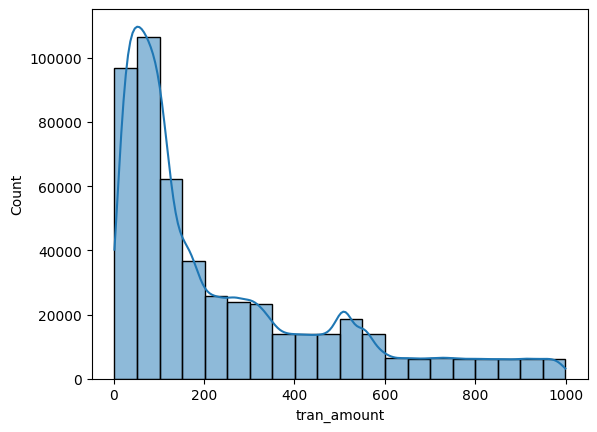

In [137]:
sns.histplot(x='tran_amount', data=df_trans, bins=20, kde=True)

In [138]:
## Above shows the histogram of transactions after the removal of outliers. You can see that distribution is right skewed. Transaction amount now is less than 1000

### 10 Data Visualization - Transaction

In [139]:
df_trans.head()

,tran_id,cust_id,tran_date,tran_amount,platform,product_category,payment_type
0,1,705,2023-01-01,63.0,Flipkart,Electronics,Phonepe
1,2,385,2023-01-01,99.0,Alibaba,Fashion & Apparel,Credit Card
2,3,924,2023-01-01,471.0,Shopify,Sports,Phonepe
3,4,797,2023-01-01,33.0,Shopify,Fashion & Apparel,Gpay
4,5,482,2023-01-01,68.0,Amazon,Fashion & Apparel,Net Banking


C:\Users\Suraj Khodade\AppData\Local\Temp\ipykernel_11128\4201096356.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(df_trans.payment_type, palette='viridis', stat='percent')


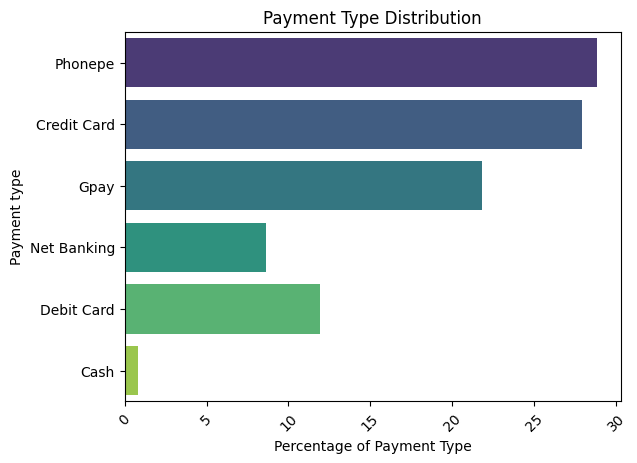

In [140]:
sns.countplot(df_trans.payment_type, palette='viridis', stat='percent')
plt.title('Payment Type Distribution')
plt.xlabel('Percentage of Payment Type')
plt.ylabel('Payment type')
plt.xticks(rotation=45) 
plt.show()


In [141]:
df_merged_2 = df_merged.merge(df_trans, on='cust_id', how='inner')
df_merged_2.head(3)

,cust_id,name,gender,age,location,occupation,annual_income,marital_status,age_group,age_group_cut,...,credit_inquiries_last_6_months,credit_limit,credit_score_range,credit_limit_mode,tran_id,tran_date,tran_amount,platform,product_category,payment_type
0,1,Manya Acharya,Female,51.0,City,Business Owner,358211.0,Married,49-65,49-65,...,0.0,40000.0,700-749,40000.0,1283,2023-01-01,30.0,Shopify,Fashion & Apparel,Net Banking
1,1,Manya Acharya,Female,51.0,City,Business Owner,358211.0,Married,49-65,49-65,...,0.0,40000.0,700-749,40000.0,1382,2023-01-01,96.0,Amazon,Sports,Debit Card
2,1,Manya Acharya,Female,51.0,City,Business Owner,358211.0,Married,49-65,49-65,...,0.0,40000.0,700-749,40000.0,1521,2023-01-01,86.0,Meesho,Garden & Outdoor,Gpay


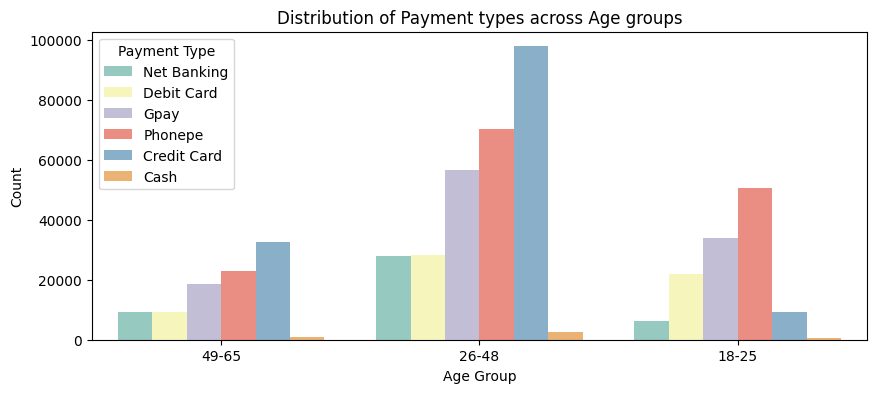

In [142]:
plt.figure(figsize=(10, 4))
sns.countplot(x='age_group', hue='payment_type', data=df_merged_2, palette='Set3')
plt.title('Distribution of Payment types across Age groups')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Payment Type', loc='upper left')

plt.show()

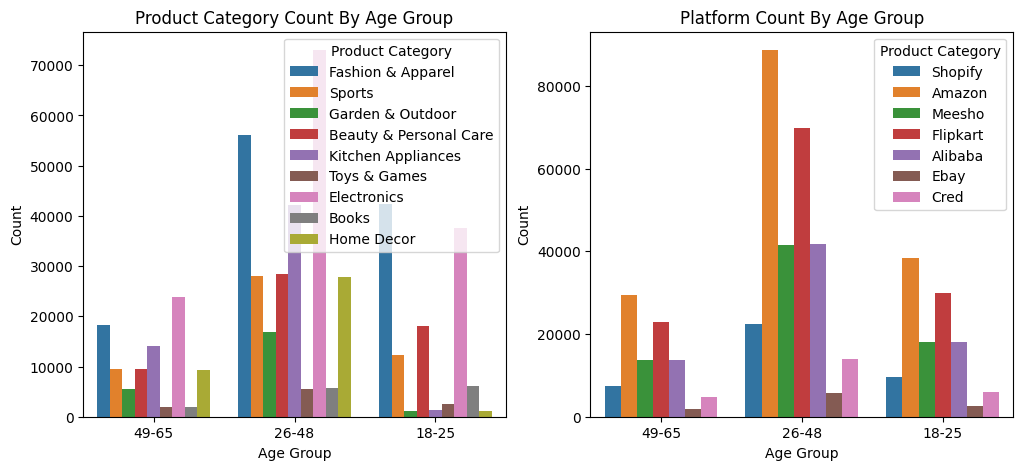

In [143]:
## From above analysis, we can see that age group 18-25 has less exposure to credit cards compared to other groups
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,5))

sns.countplot(x='age_group', hue="product_category", data=df_merged_2, ax=ax1)
ax1.set_title("Product Category Count By Age Group")
ax1.set_xlabel("Age Group")
ax1.set_ylabel("Count")
ax1.legend(title="Product Category", loc='upper right')

sns.countplot(x='age_group', hue="platform", data=df_merged_2, ax=ax2)
ax2.set_title("Platform Count By Age Group")
ax2.set_xlabel("Age Group")
ax2.set_ylabel("Count")
ax2.legend(title="Product Category", loc='upper right')

plt.show()

### Observations:

1. Top 3 purchasing categories of customers in age group (18 -25) : Electronics, Fashion & Apparel, Beauty & personal care
1. Top platforms : Amazon, Flipkart, Alibaba

### 11 Data Visualization: Average Transaction Amount

In [144]:
df_merged_2 = df_merged.merge(df_trans, on='cust_id', how='inner')
df_merged_2.head(3)

,cust_id,name,gender,age,location,occupation,annual_income,marital_status,age_group,age_group_cut,...,credit_inquiries_last_6_months,credit_limit,credit_score_range,credit_limit_mode,tran_id,tran_date,tran_amount,platform,product_category,payment_type
0,1,Manya Acharya,Female,51.0,City,Business Owner,358211.0,Married,49-65,49-65,...,0.0,40000.0,700-749,40000.0,1283,2023-01-01,30.0,Shopify,Fashion & Apparel,Net Banking
1,1,Manya Acharya,Female,51.0,City,Business Owner,358211.0,Married,49-65,49-65,...,0.0,40000.0,700-749,40000.0,1382,2023-01-01,96.0,Amazon,Sports,Debit Card
2,1,Manya Acharya,Female,51.0,City,Business Owner,358211.0,Married,49-65,49-65,...,0.0,40000.0,700-749,40000.0,1521,2023-01-01,86.0,Meesho,Garden & Outdoor,Gpay


In [145]:
df_merged_2.shape

(500000, 23)

C:\Users\Suraj Khodade\AppData\Local\Temp\ipykernel_11128\1071203157.py:19: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=cat_col, y='tran_amount', data=sorted_data, ci=None, ax=axes[i], palette='tab10')
C:\Users\Suraj Khodade\AppData\Local\Temp\ipykernel_11128\1071203157.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cat_col, y='tran_amount', data=sorted_data, ci=None, ax=axes[i], palette='tab10')
C:\Users\Suraj Khodade\AppData\Local\Temp\ipykernel_11128\1071203157.py:25: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45)
C:\Users\Suraj Khodade\AppData\Local\Temp\ipykernel_11128\1071203157.py:19: FutureWarning: 

The `ci` para

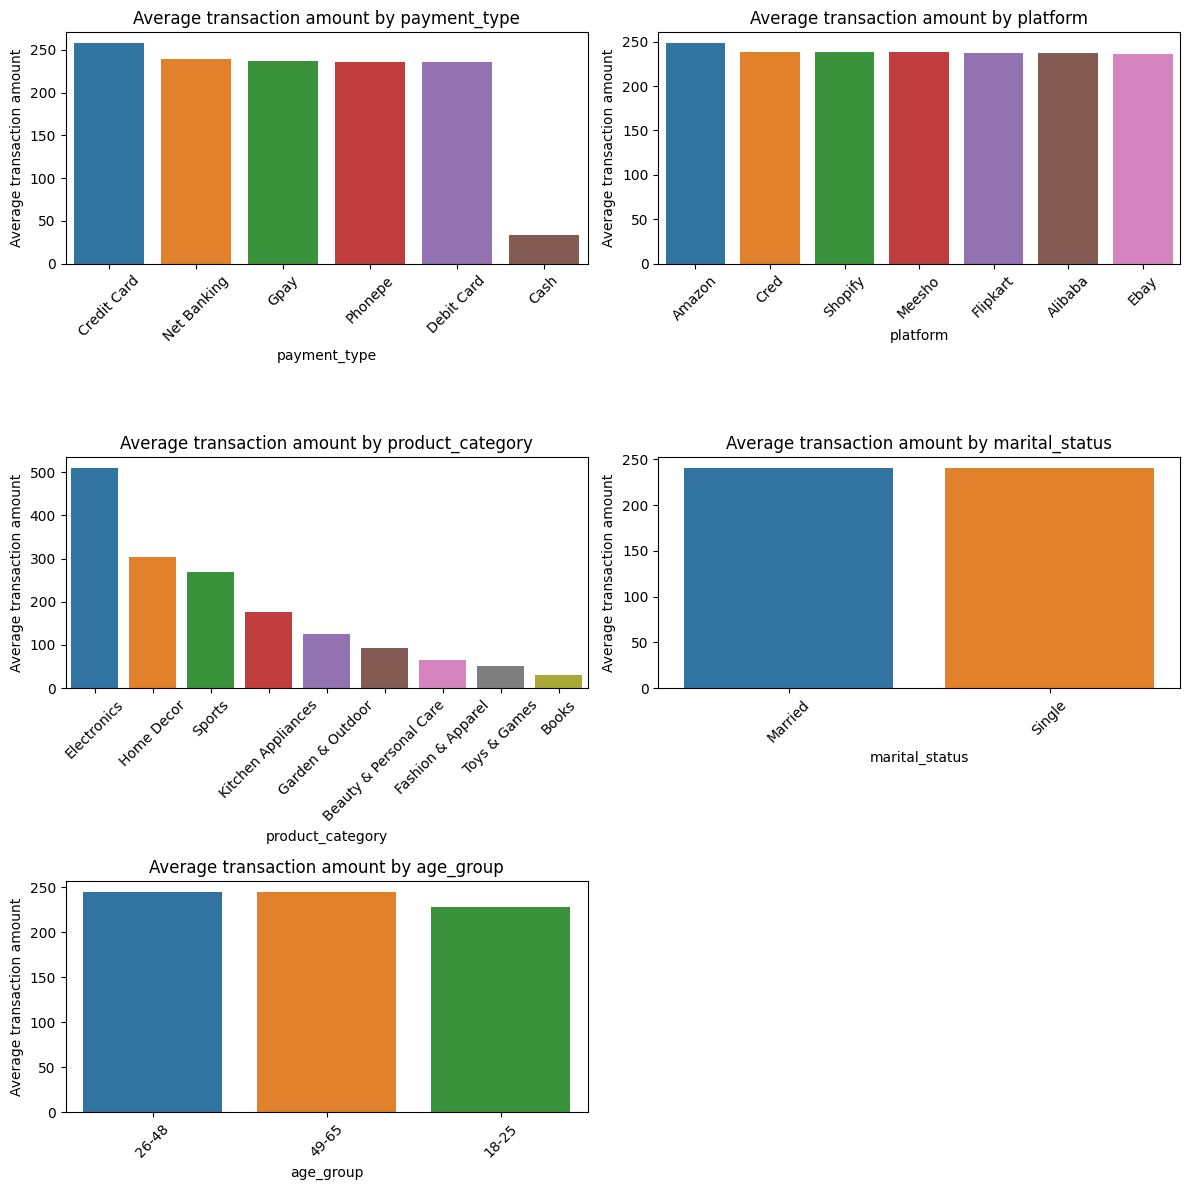

In [146]:
# List of categorical columns
cat_cols = ['payment_type', 'platform', 'product_category', 'marital_status', 'age_group']

num_rows = 3
# Create subplots
fig, axes = plt.subplots(num_rows, 2, figsize=(12, 4 * num_rows))

# Flatten the axes array to make it easier to iterate
axes = axes.flatten()

# Create subplots for each categorical column
for i, cat_col in enumerate(cat_cols):
    # Calculate the average annual income for each category
    avg_tran_amount_by_category = df_merged_2.groupby(cat_col)['tran_amount'].mean().reset_index()
    
    # Sort the data by 'annual_income' before plotting
    sorted_data = avg_tran_amount_by_category.sort_values(by='tran_amount', ascending=False)
    
    sns.barplot(x=cat_col, y='tran_amount', data=sorted_data, ci=None, ax=axes[i], palette='tab10')
    axes[i].set_title(f'Average transaction amount by {cat_col}')
    axes[i].set_xlabel(cat_col)
    axes[i].set_ylabel('Average transaction amount')

    # Rotate x-axis labels for better readability
    axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45)

# Hide any unused subplots
for i in range(len(cat_cols), len(axes)):
    fig.delaxes(axes[i])
plt.tight_layout()
plt.show()

In [147]:
## Further Analysis On Age Group

## Let us do further analysis on age group to figure out their average income, credit limit, credit score etc

In [148]:
# Group the data by age group and calculate the average credit_limit and credit_score
age_group_metrics = df_merged.groupby('age_group')[['annual_income', 'credit_limit', 'credit_score']].mean().reset_index()
age_group_metrics

,age_group,annual_income,credit_limit,credit_score
0,18-25,36969.670732,1130.081301,484.451220
1,26-48,145437.104938,20560.846561,597.569665
2,49-65,259786.192513,41699.197861,701.524064


C:\Users\Suraj Khodade\AppData\Local\Temp\ipykernel_11128\2606875490.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='age_group', y='annual_income', data=age_group_metrics, palette='tab10', ax=ax1)
C:\Users\Suraj Khodade\AppData\Local\Temp\ipykernel_11128\2606875490.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='age_group', y='credit_limit', data=age_group_metrics, palette='hls', ax=ax2)
C:\Users\Suraj Khodade\AppData\Local\Temp\ipykernel_11128\2606875490.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='age_group', y='c

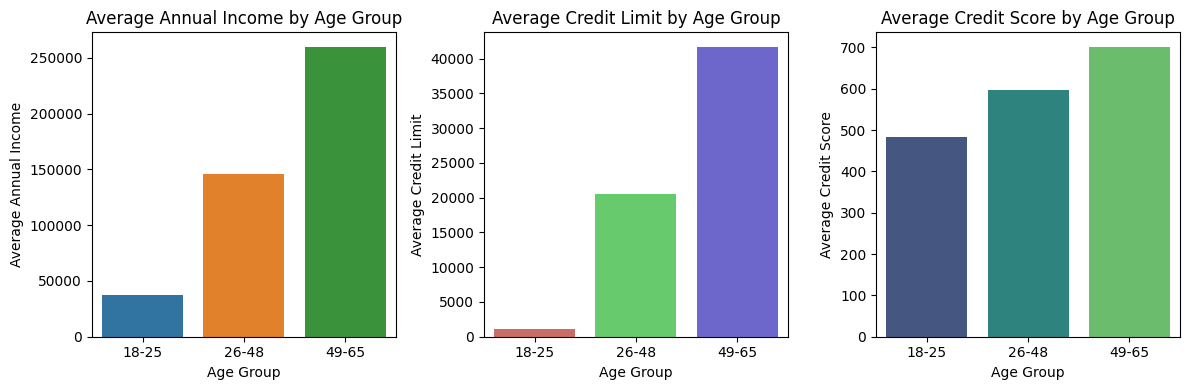

In [149]:
# Create subplots
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12, 4))

# Plot 1: Average annual income by age group
sns.barplot(x='age_group', y='annual_income', data=age_group_metrics, palette='tab10', ax=ax1)
ax1.set_title('Average Annual Income by Age Group')
ax1.set_xlabel('Age Group')
ax1.set_ylabel('Average Annual Income')
ax1.tick_params(axis='x', rotation=0)

# Plot 2: Average Max Credit Limit by Age Group
sns.barplot(x='age_group', y='credit_limit', data=age_group_metrics, palette='hls', ax=ax2)
ax2.set_title('Average Credit Limit by Age Group')
ax2.set_xlabel('Age Group')
ax2.set_ylabel('Average Credit Limit')
ax2.tick_params(axis='x', rotation=0)

# Plot 3: Average Credit Score by Age Group
sns.barplot(x='age_group', y='credit_score', data=age_group_metrics, palette='viridis', ax=ax3)
ax3.set_title('Average Credit Score by Age Group')
ax3.set_xlabel('Age Group')
ax3.set_ylabel('Average Credit Score')
ax3.tick_params(axis='x', rotation=0)

plt.tight_layout()
plt.show()

<h2 align="center", style="color:purple">Finalize Target Market For a Trial Credit Card Launch<h2>

1. People with age group of 18 -25 accounts to ~26% of customer base in the data
2. Avg annual income of this group is less than 50k
3. They don't have much credit history which is getting reflected in their credit score and credit limit 
4. Usage of credit cards as payment type is relatively low compared to other groups
5. Top 3 most shopping products categories : Electronics, Fashion & Apparel, Beauty & Personal care